### Modifed fetcher (3000 samples)

Include the analysis script and setup the folders with raw data

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/just_fetch/")
s3_folder_filter="1711-justfetch/s3/*benchmark_e2e*"
scratch_folder_filter="1711-justfetch/scratch/*benchmark_e2e*"

#### Load raw

In [3]:
df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 239.50it/s]


In [4]:
df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)
df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 7234.04it/s]


timestamp False


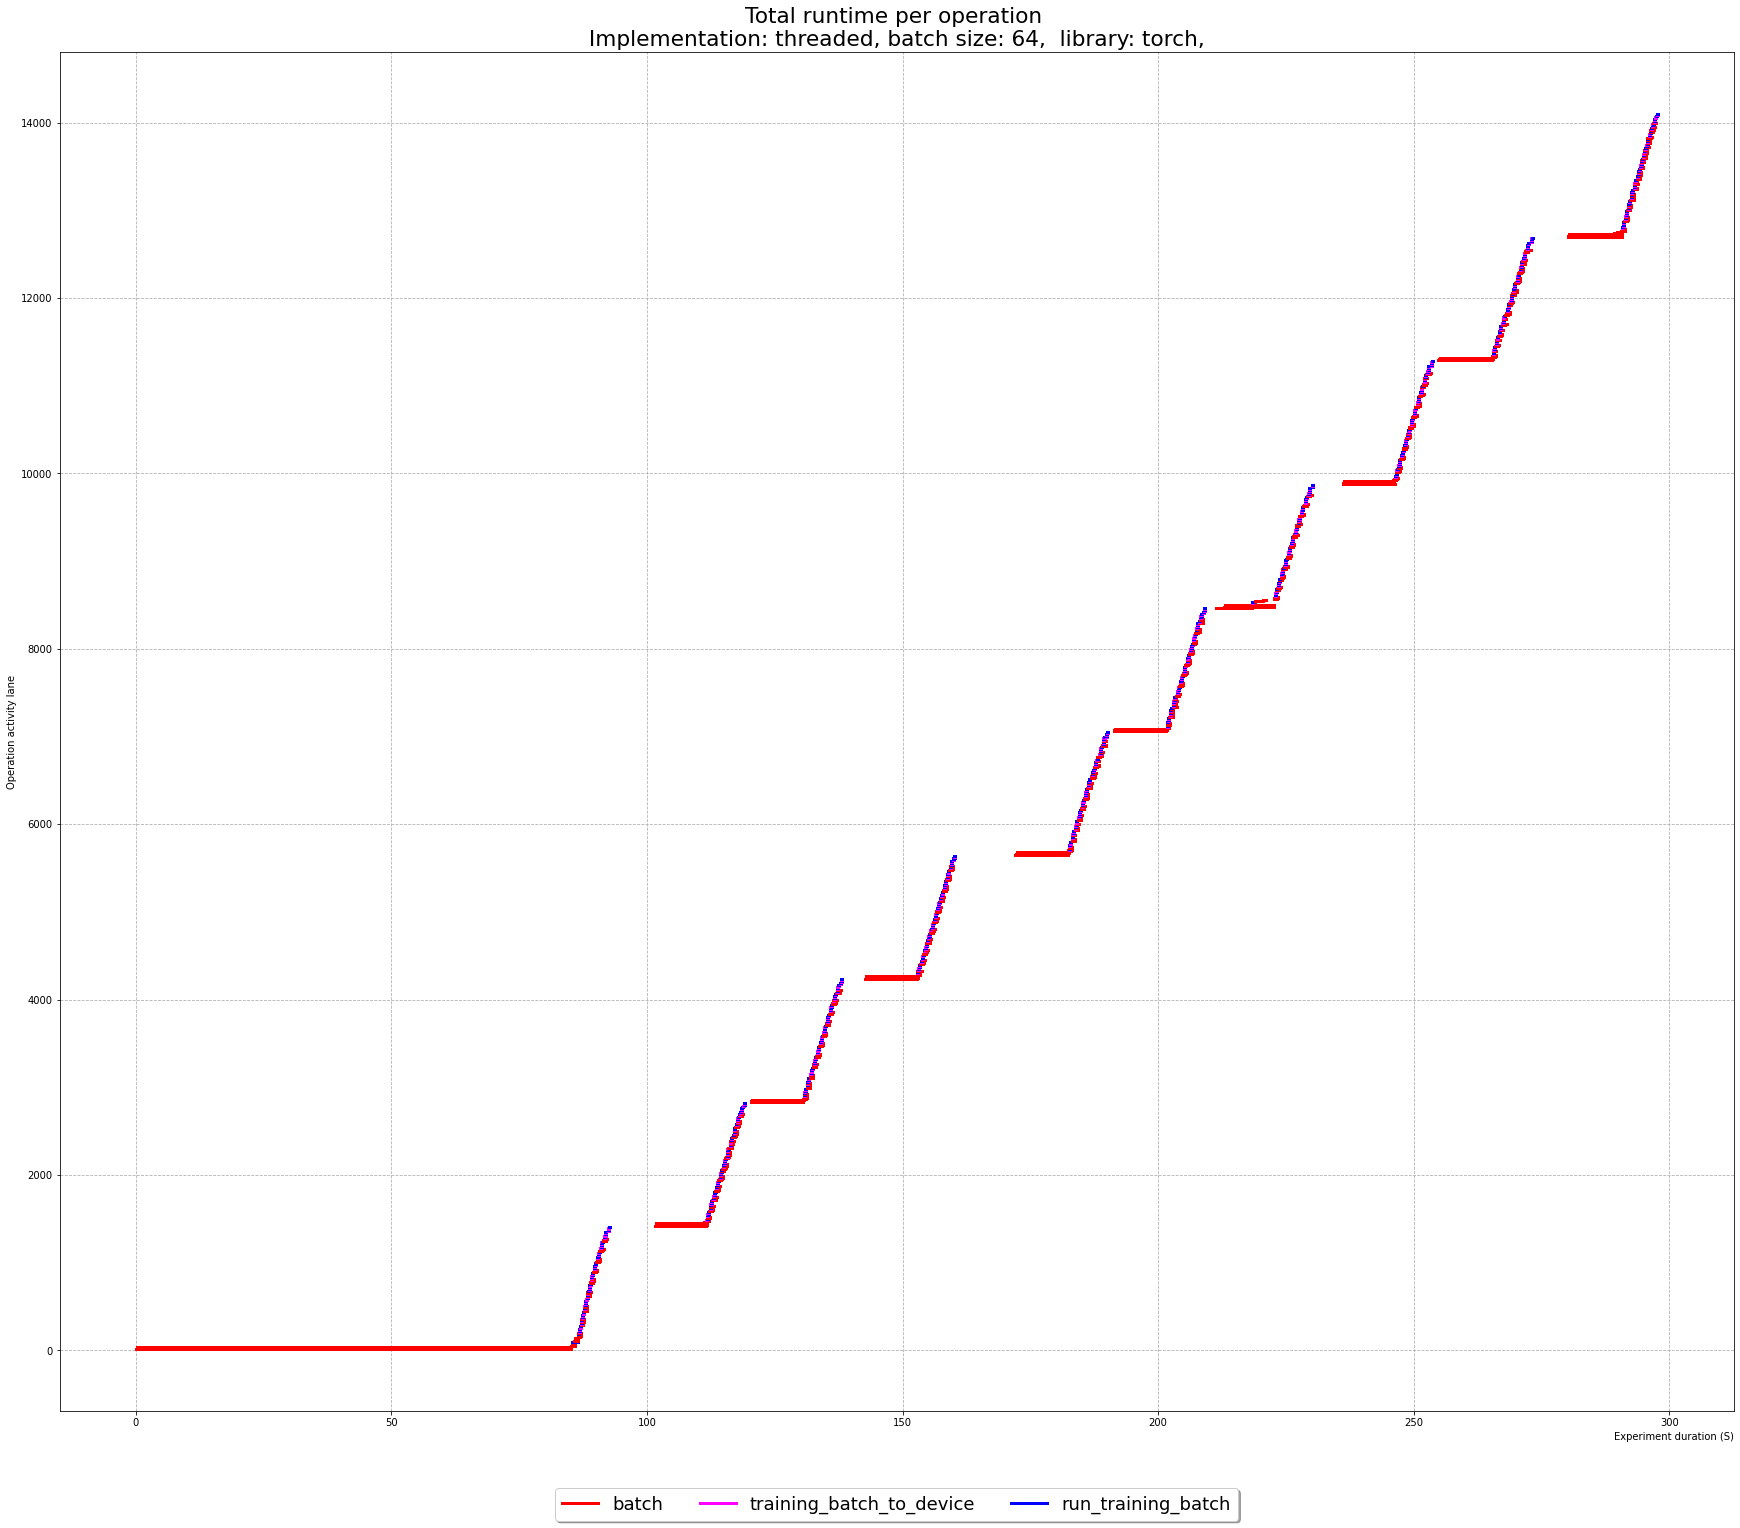

timestamp False


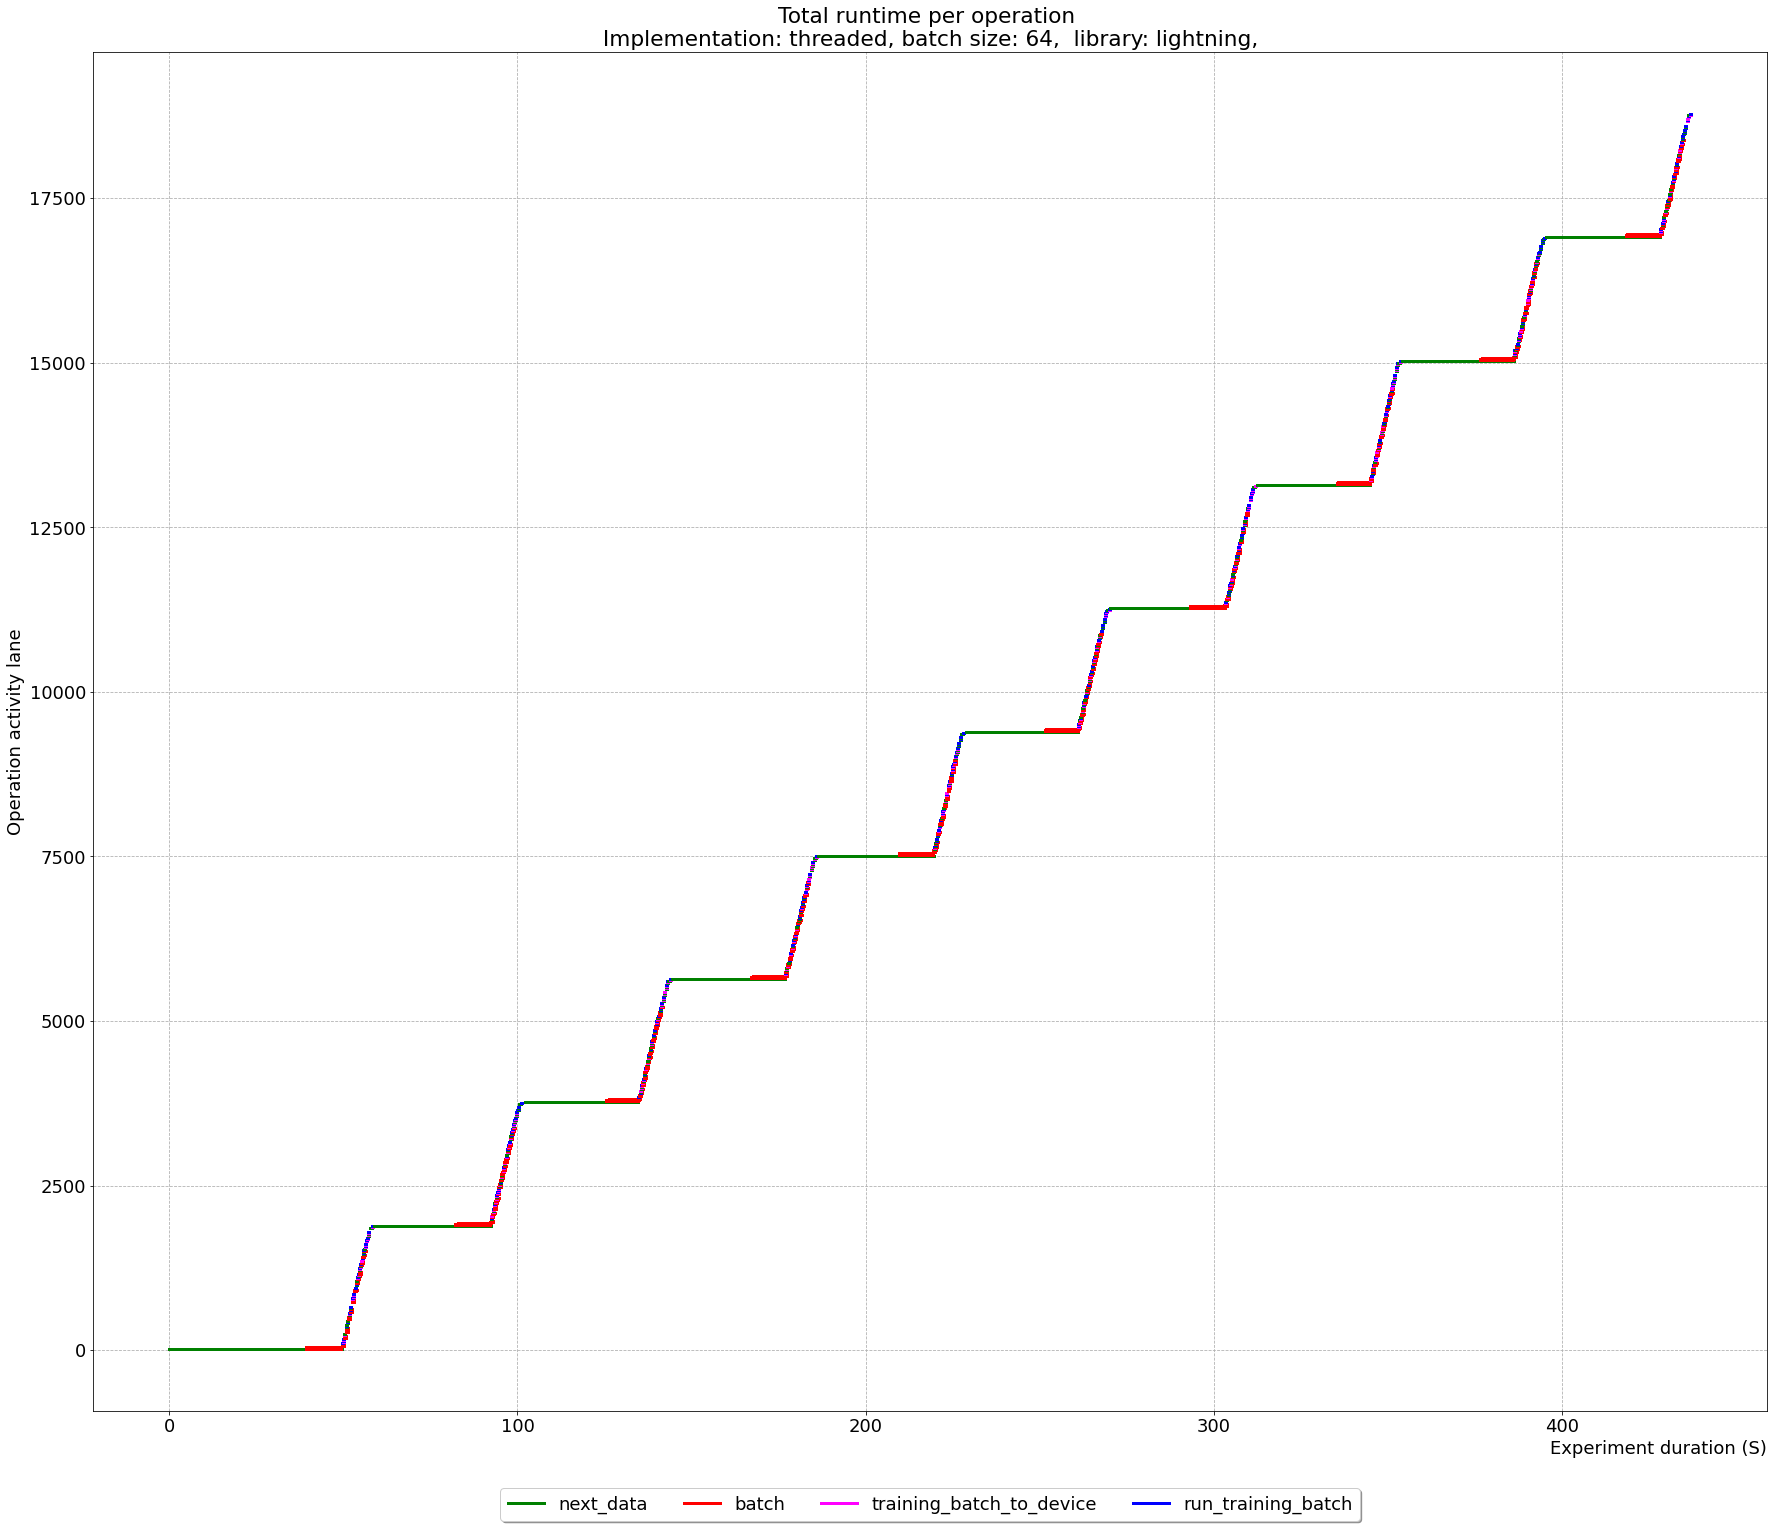

timestamp False


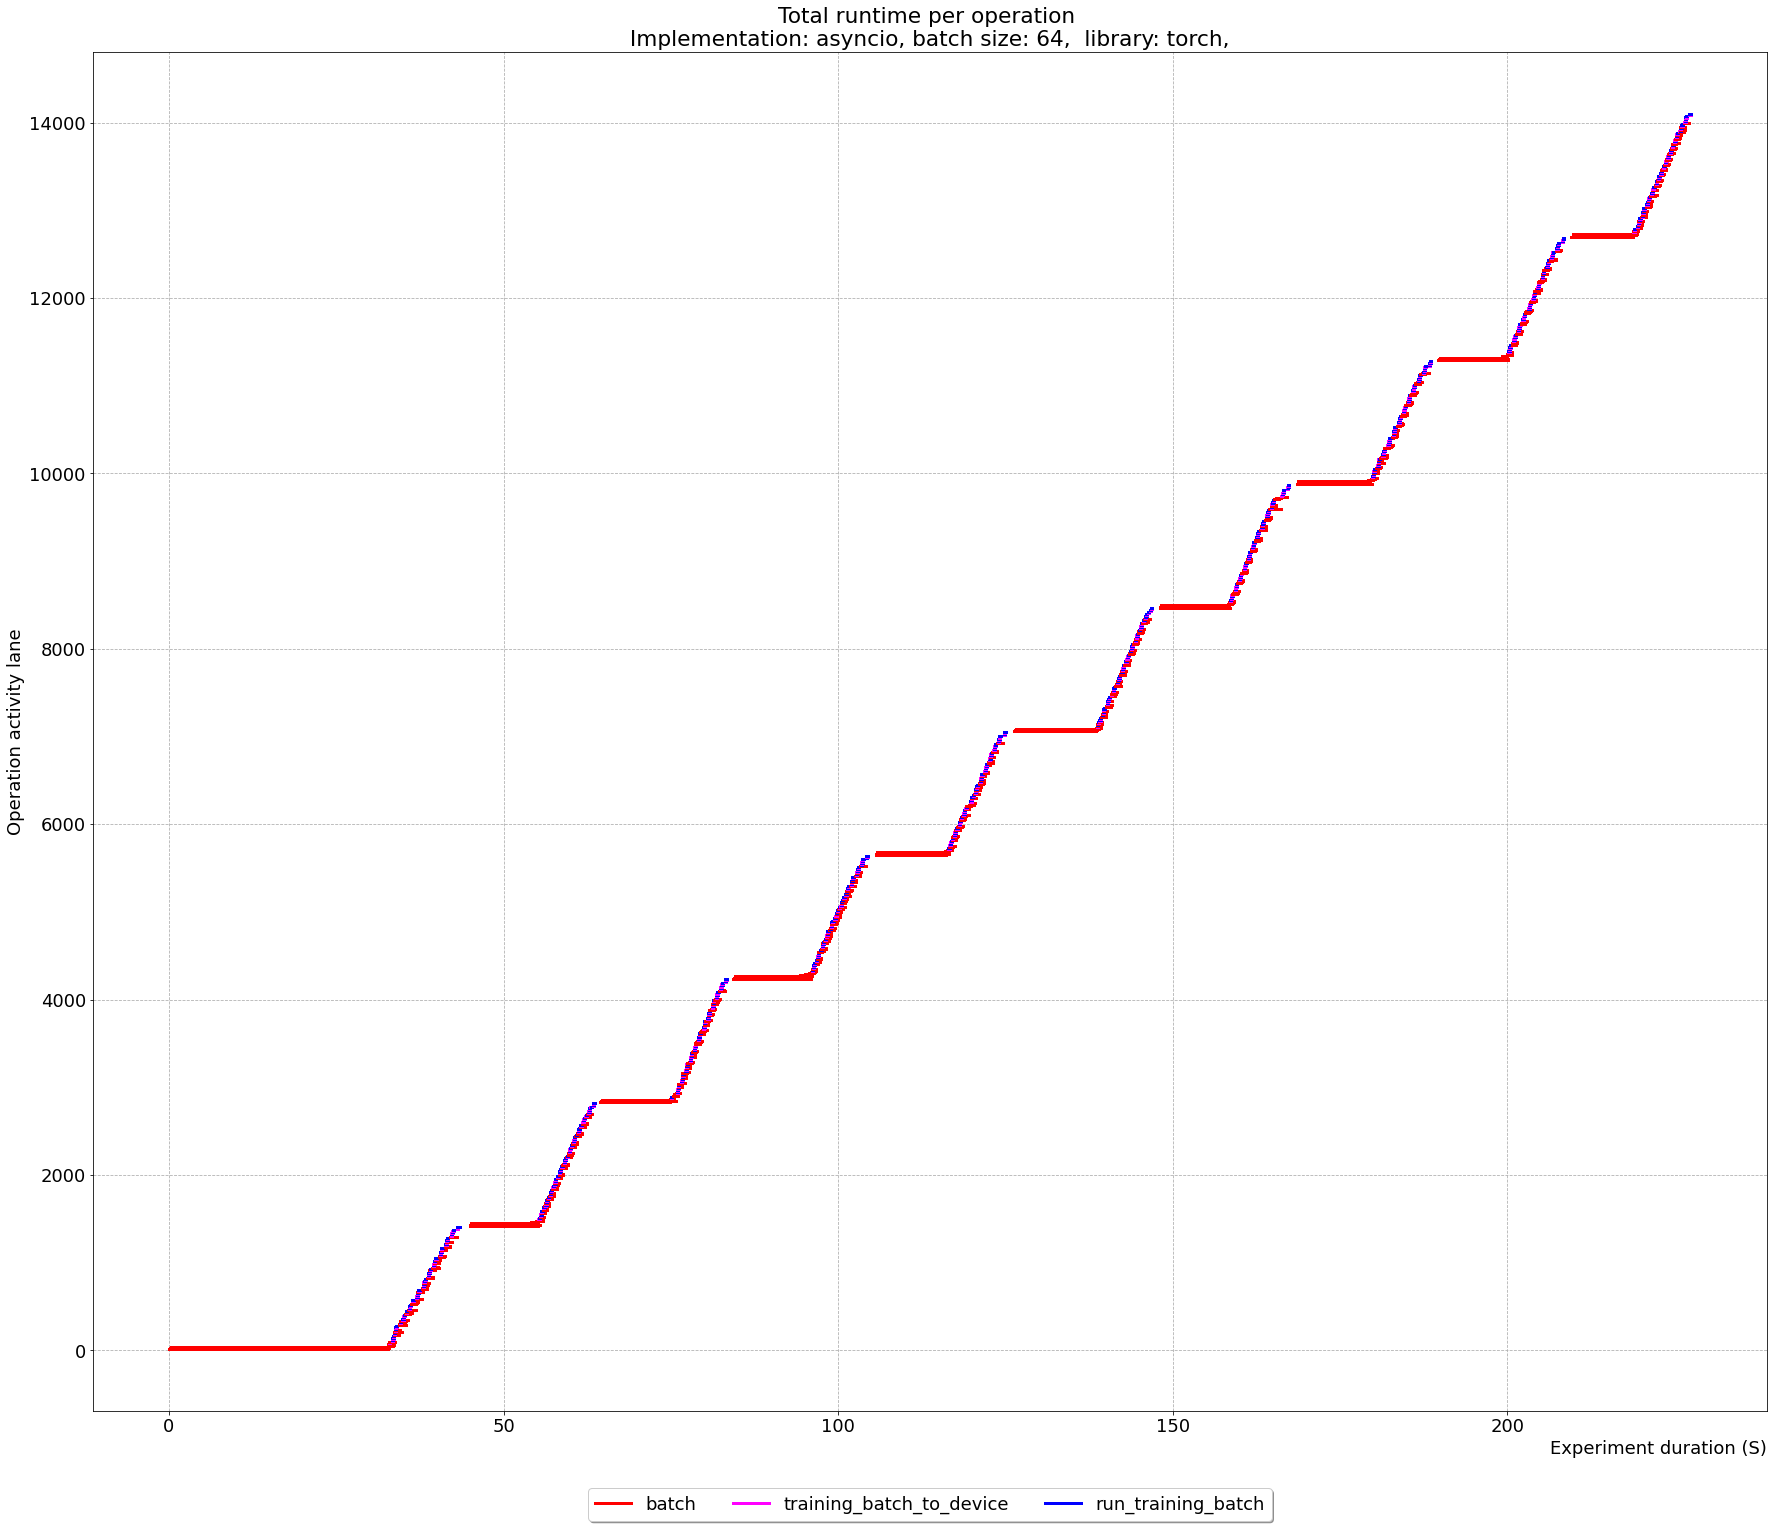

timestamp False


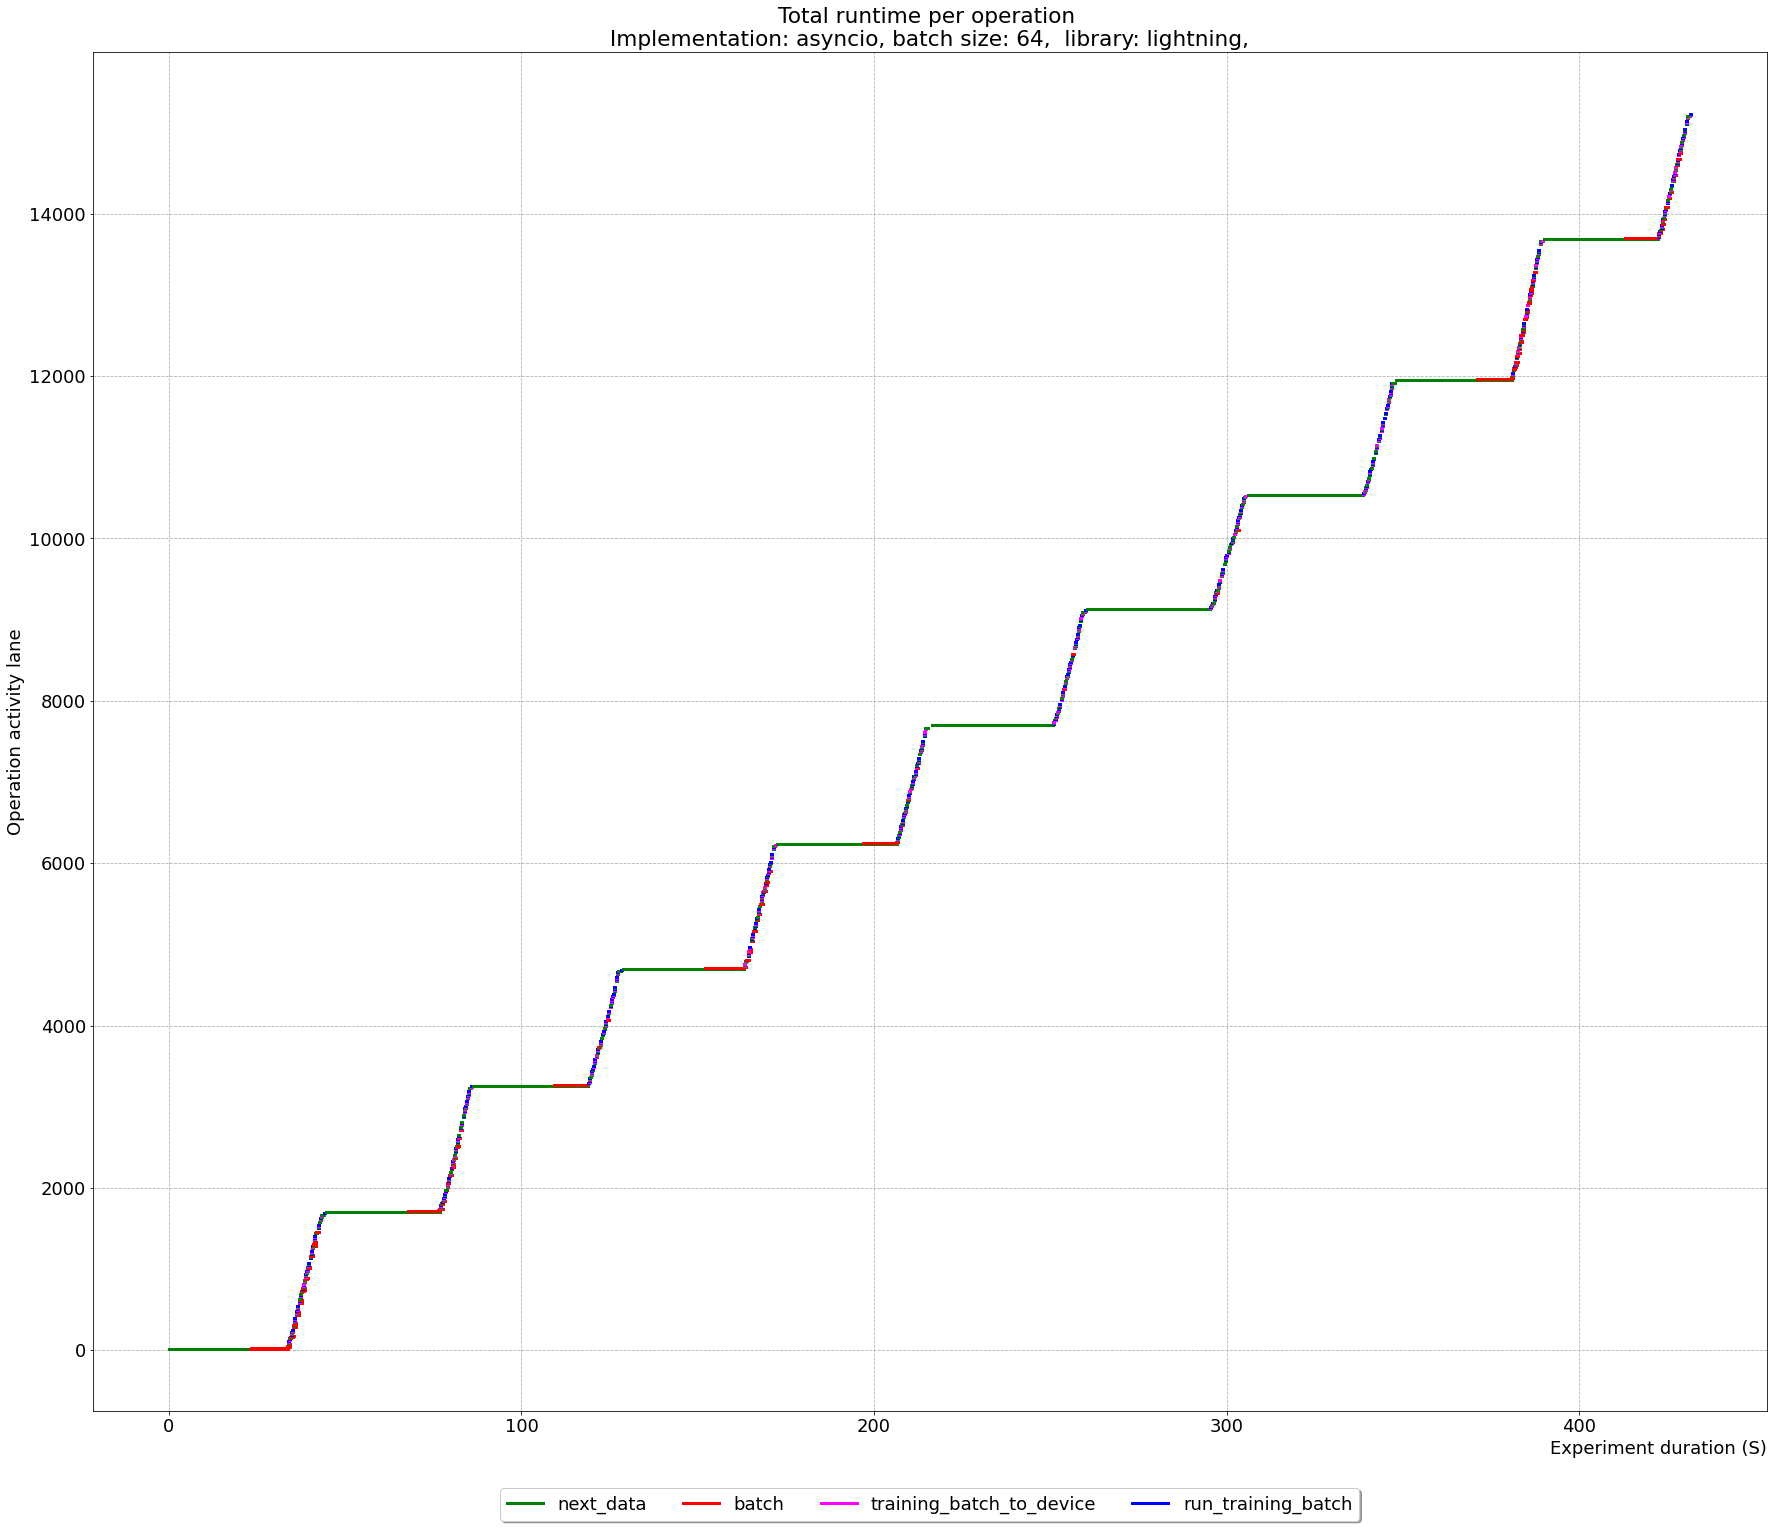

timestamp False


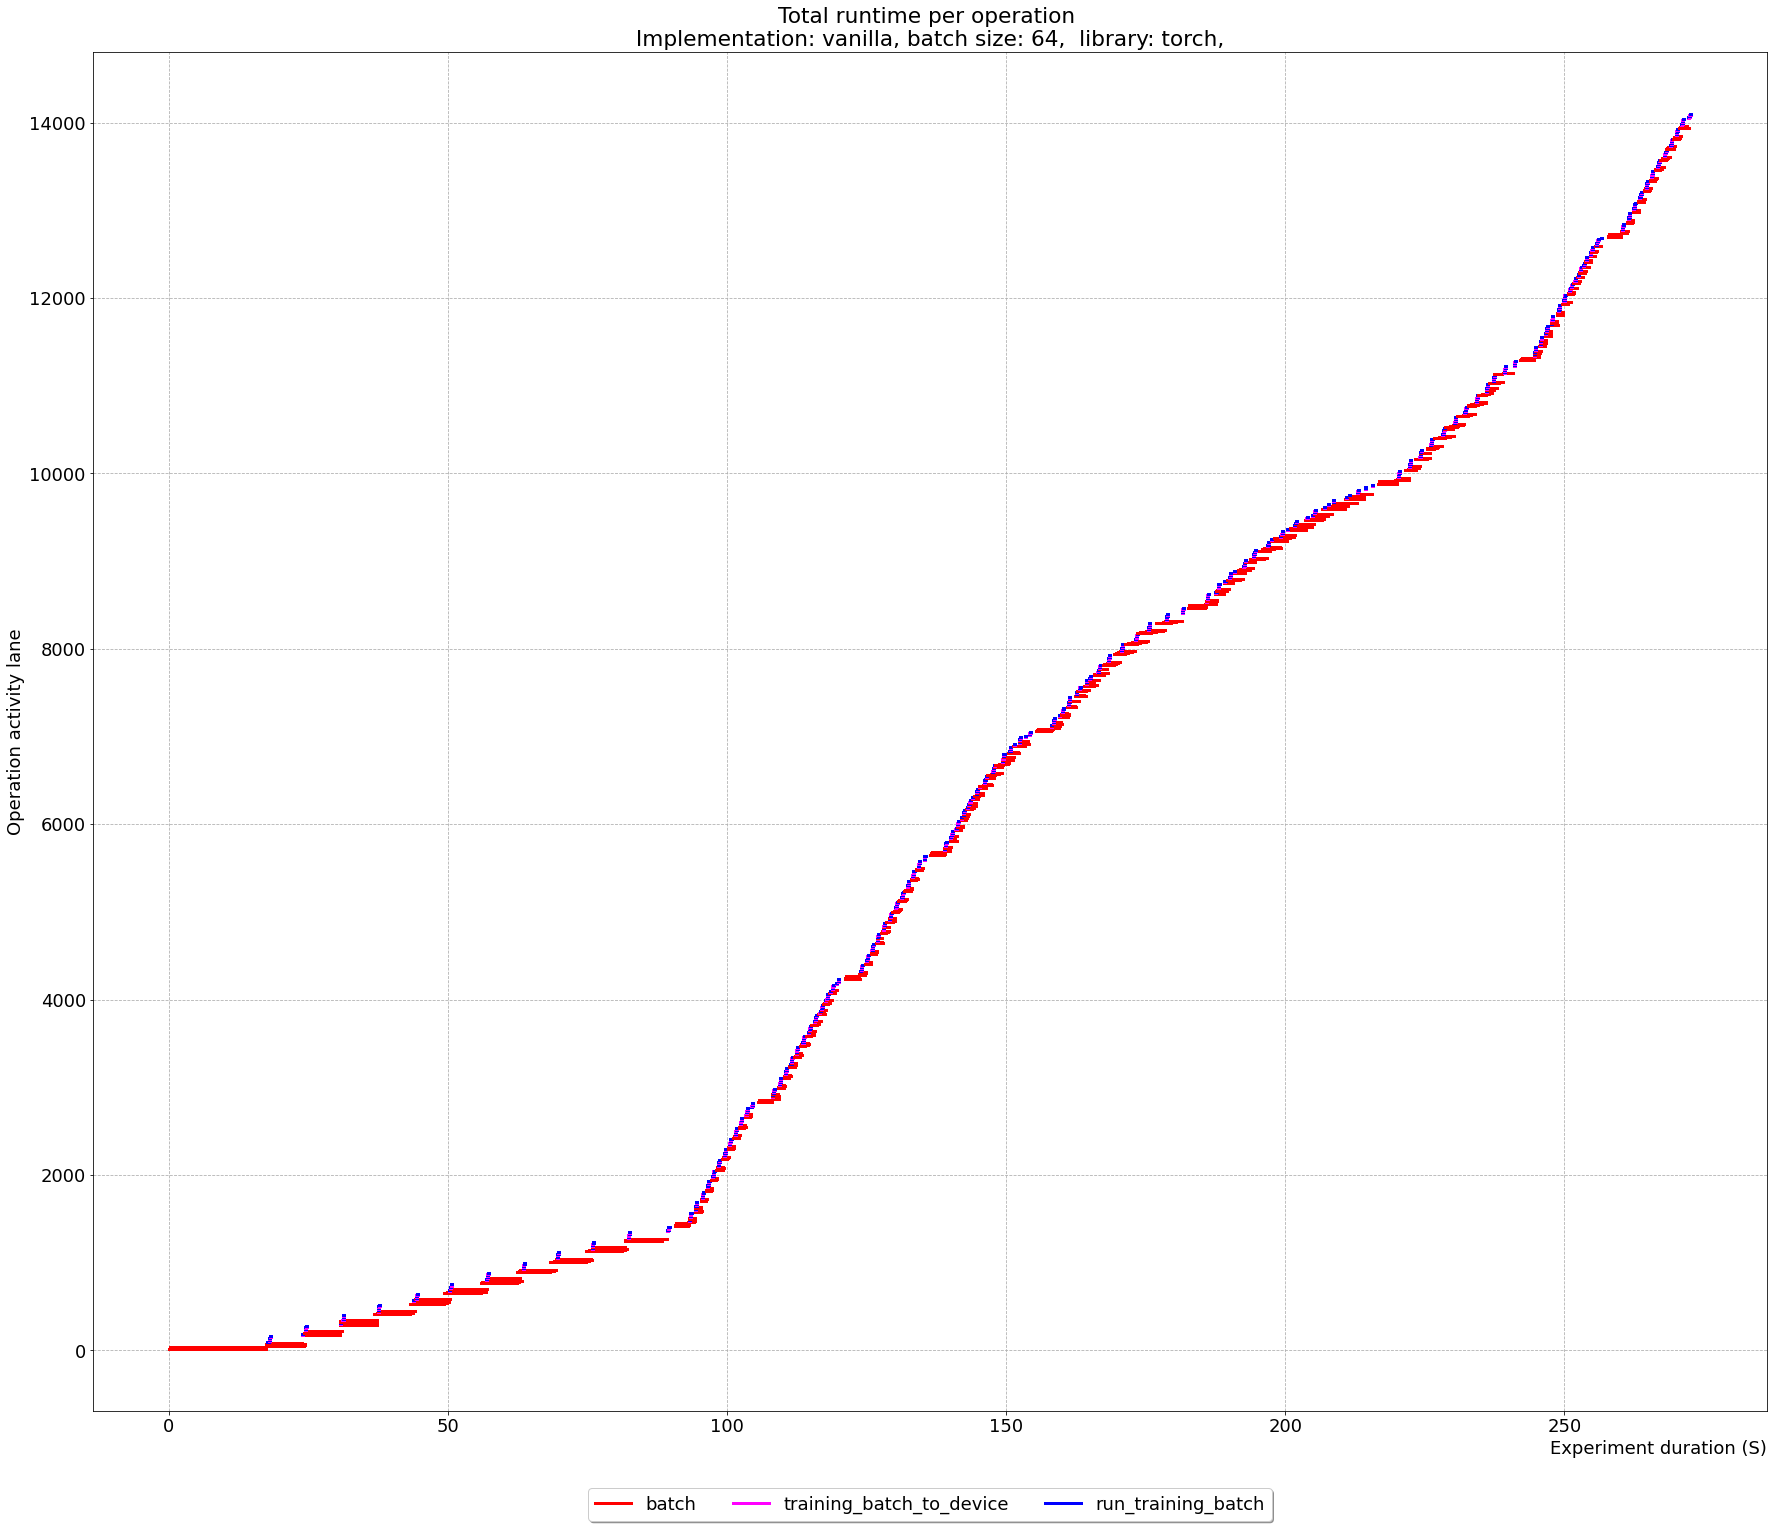

timestamp False


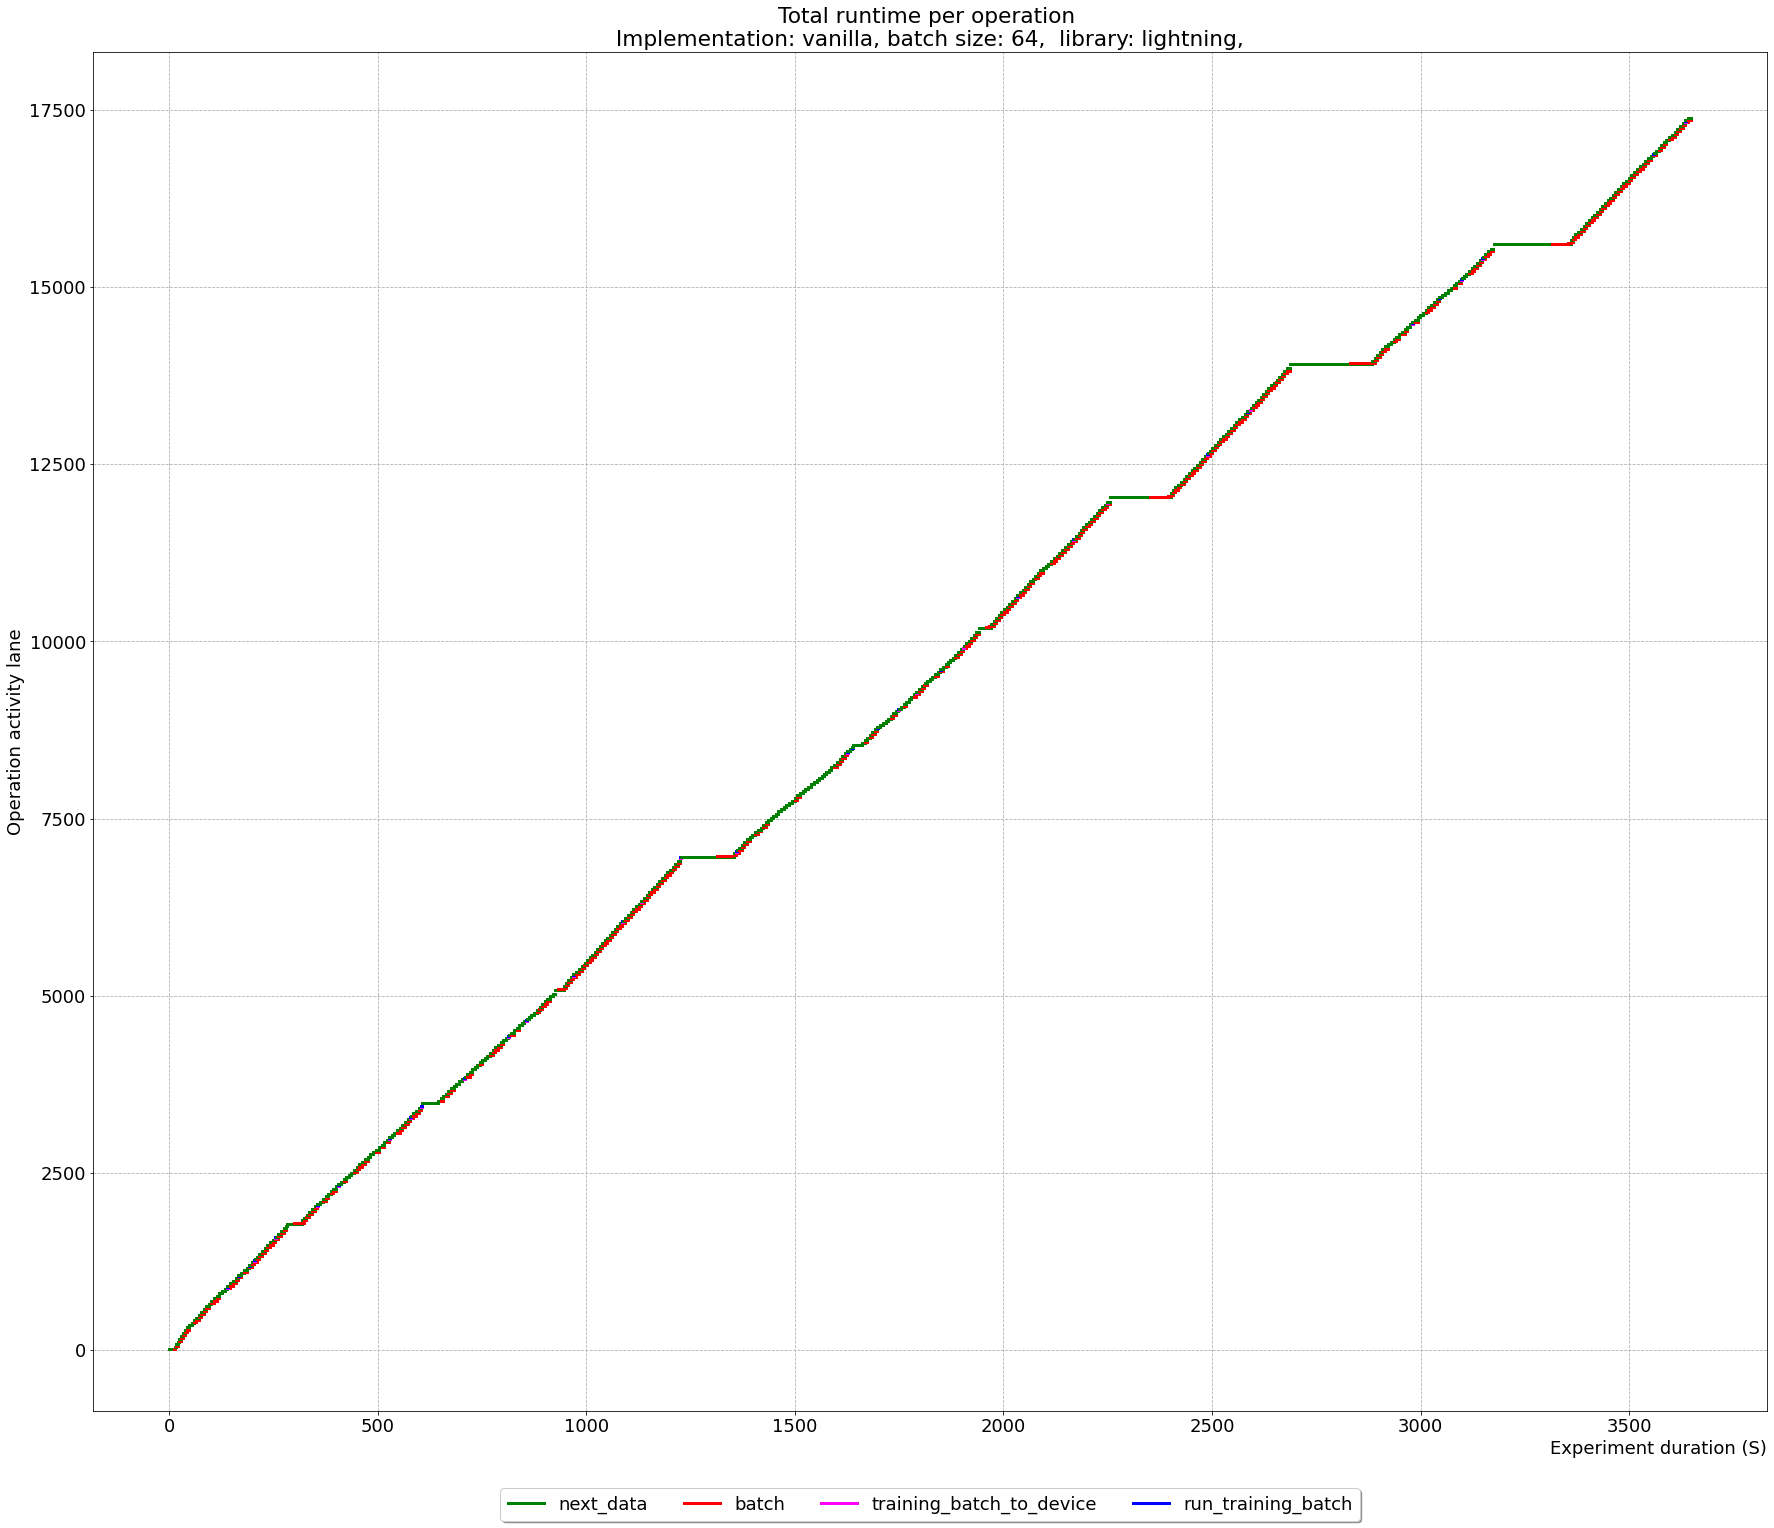

In [5]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)
returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, False, False, 2)
    result["run"]=run
    returns_s3.append(result)

timestamp False


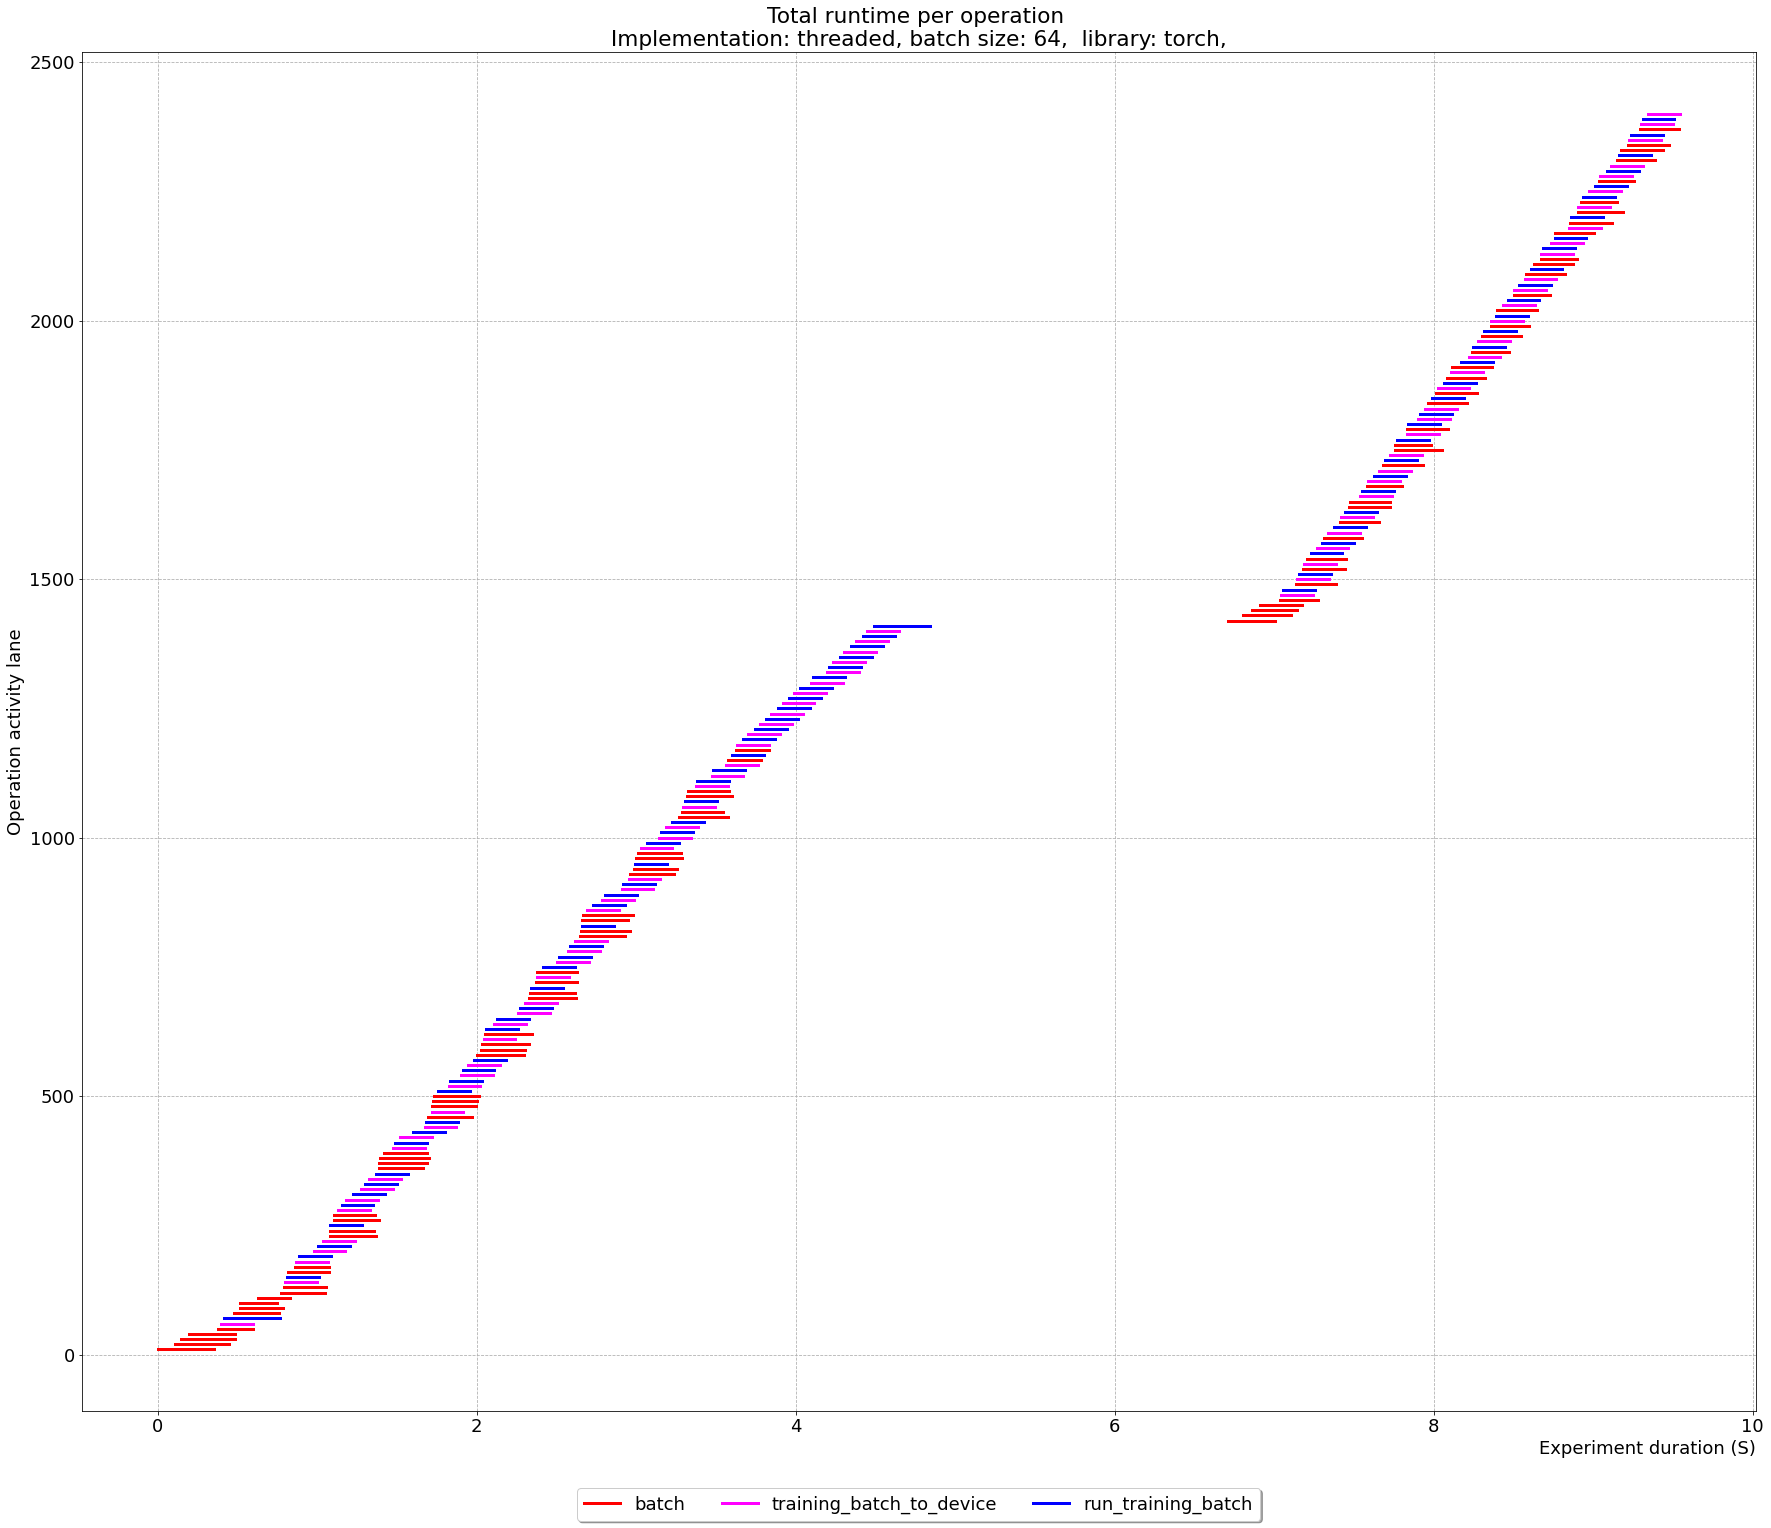

timestamp False


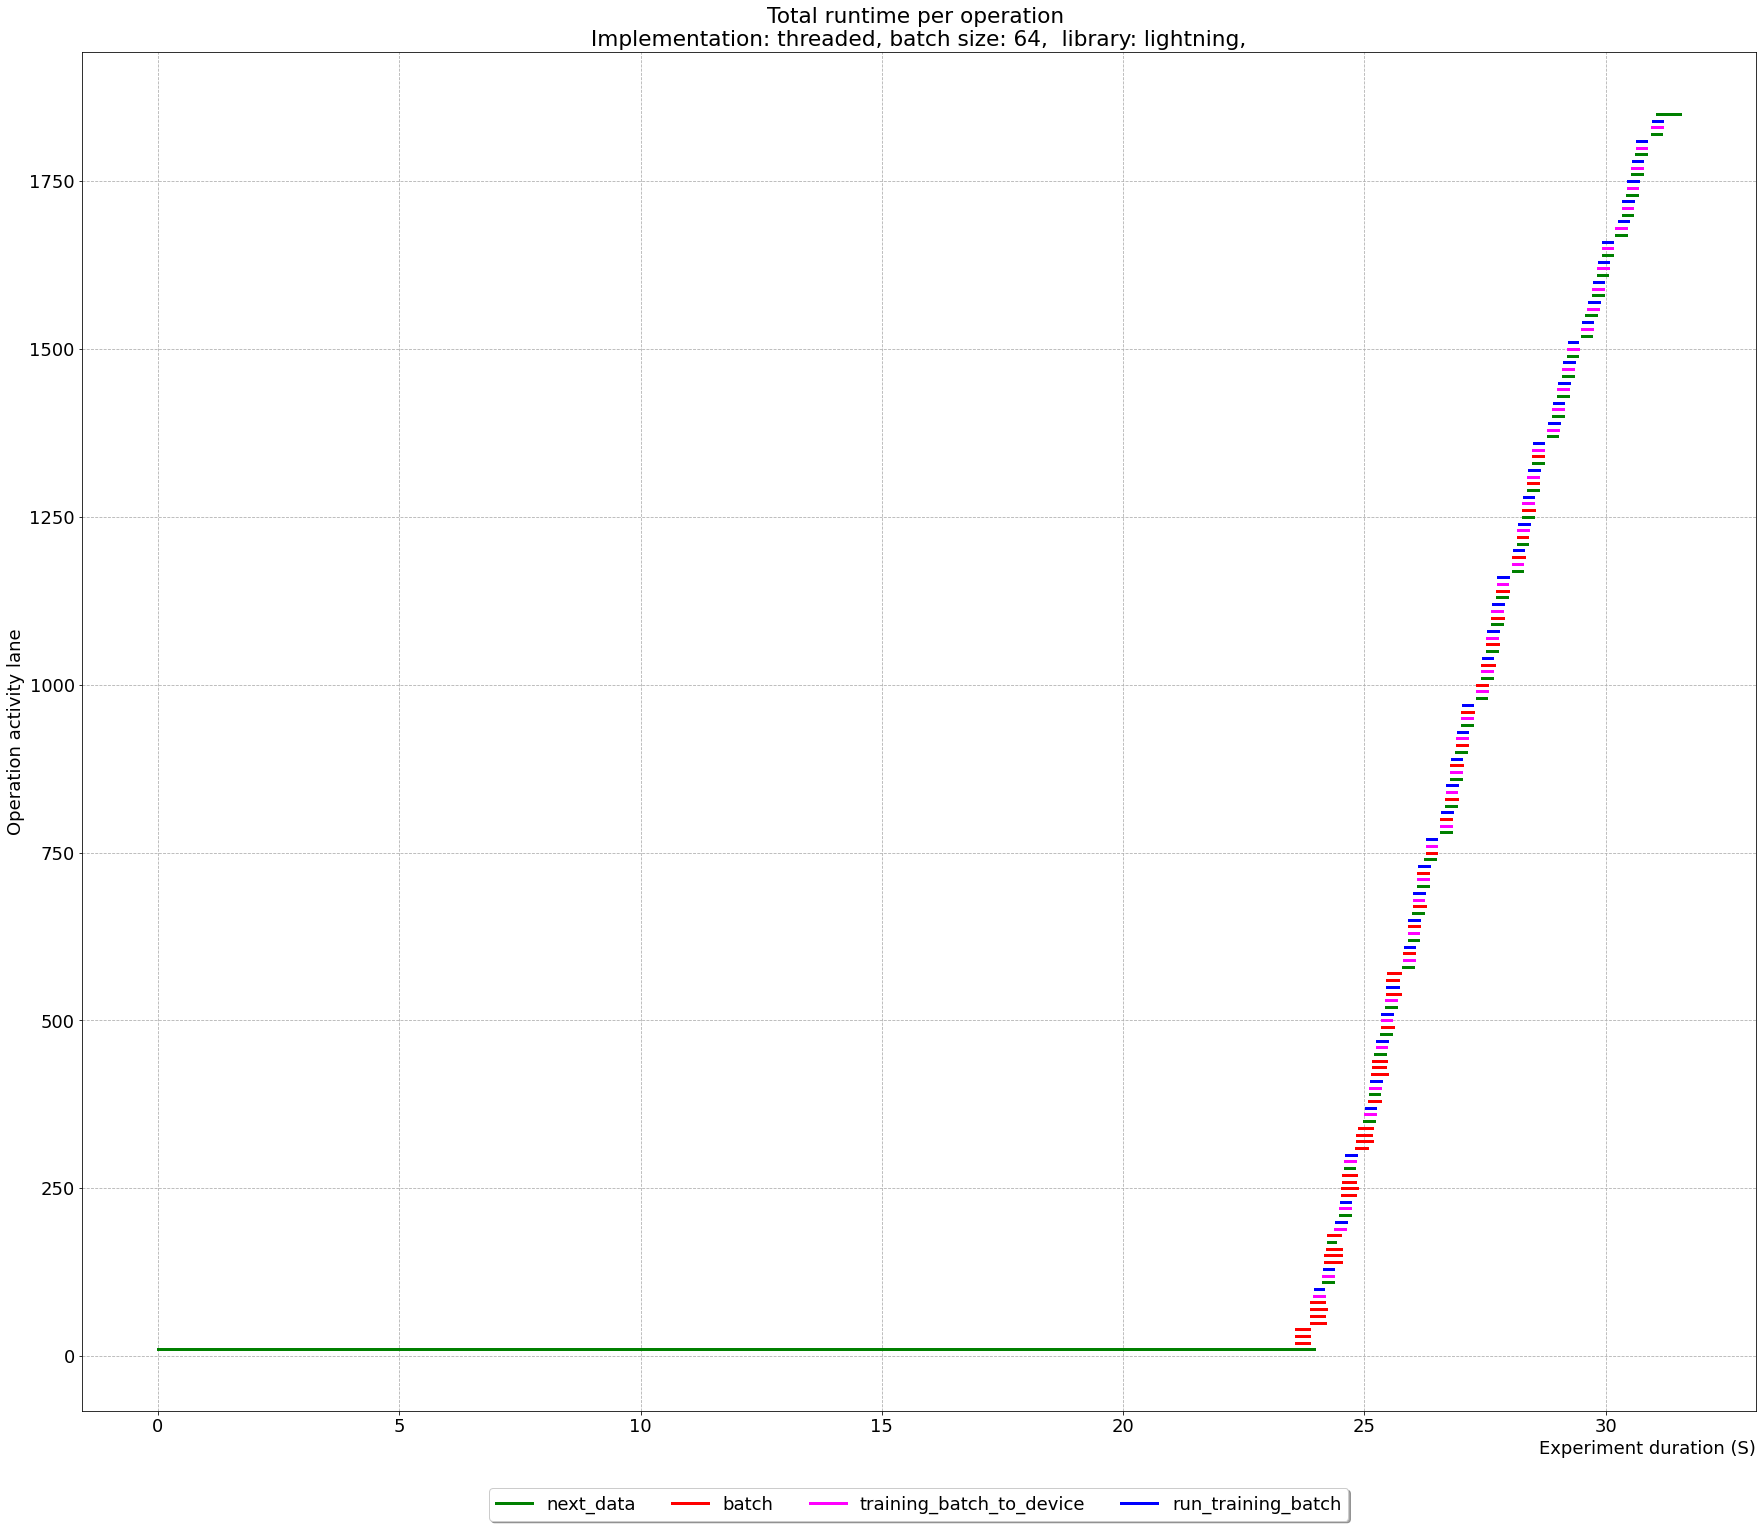

timestamp False


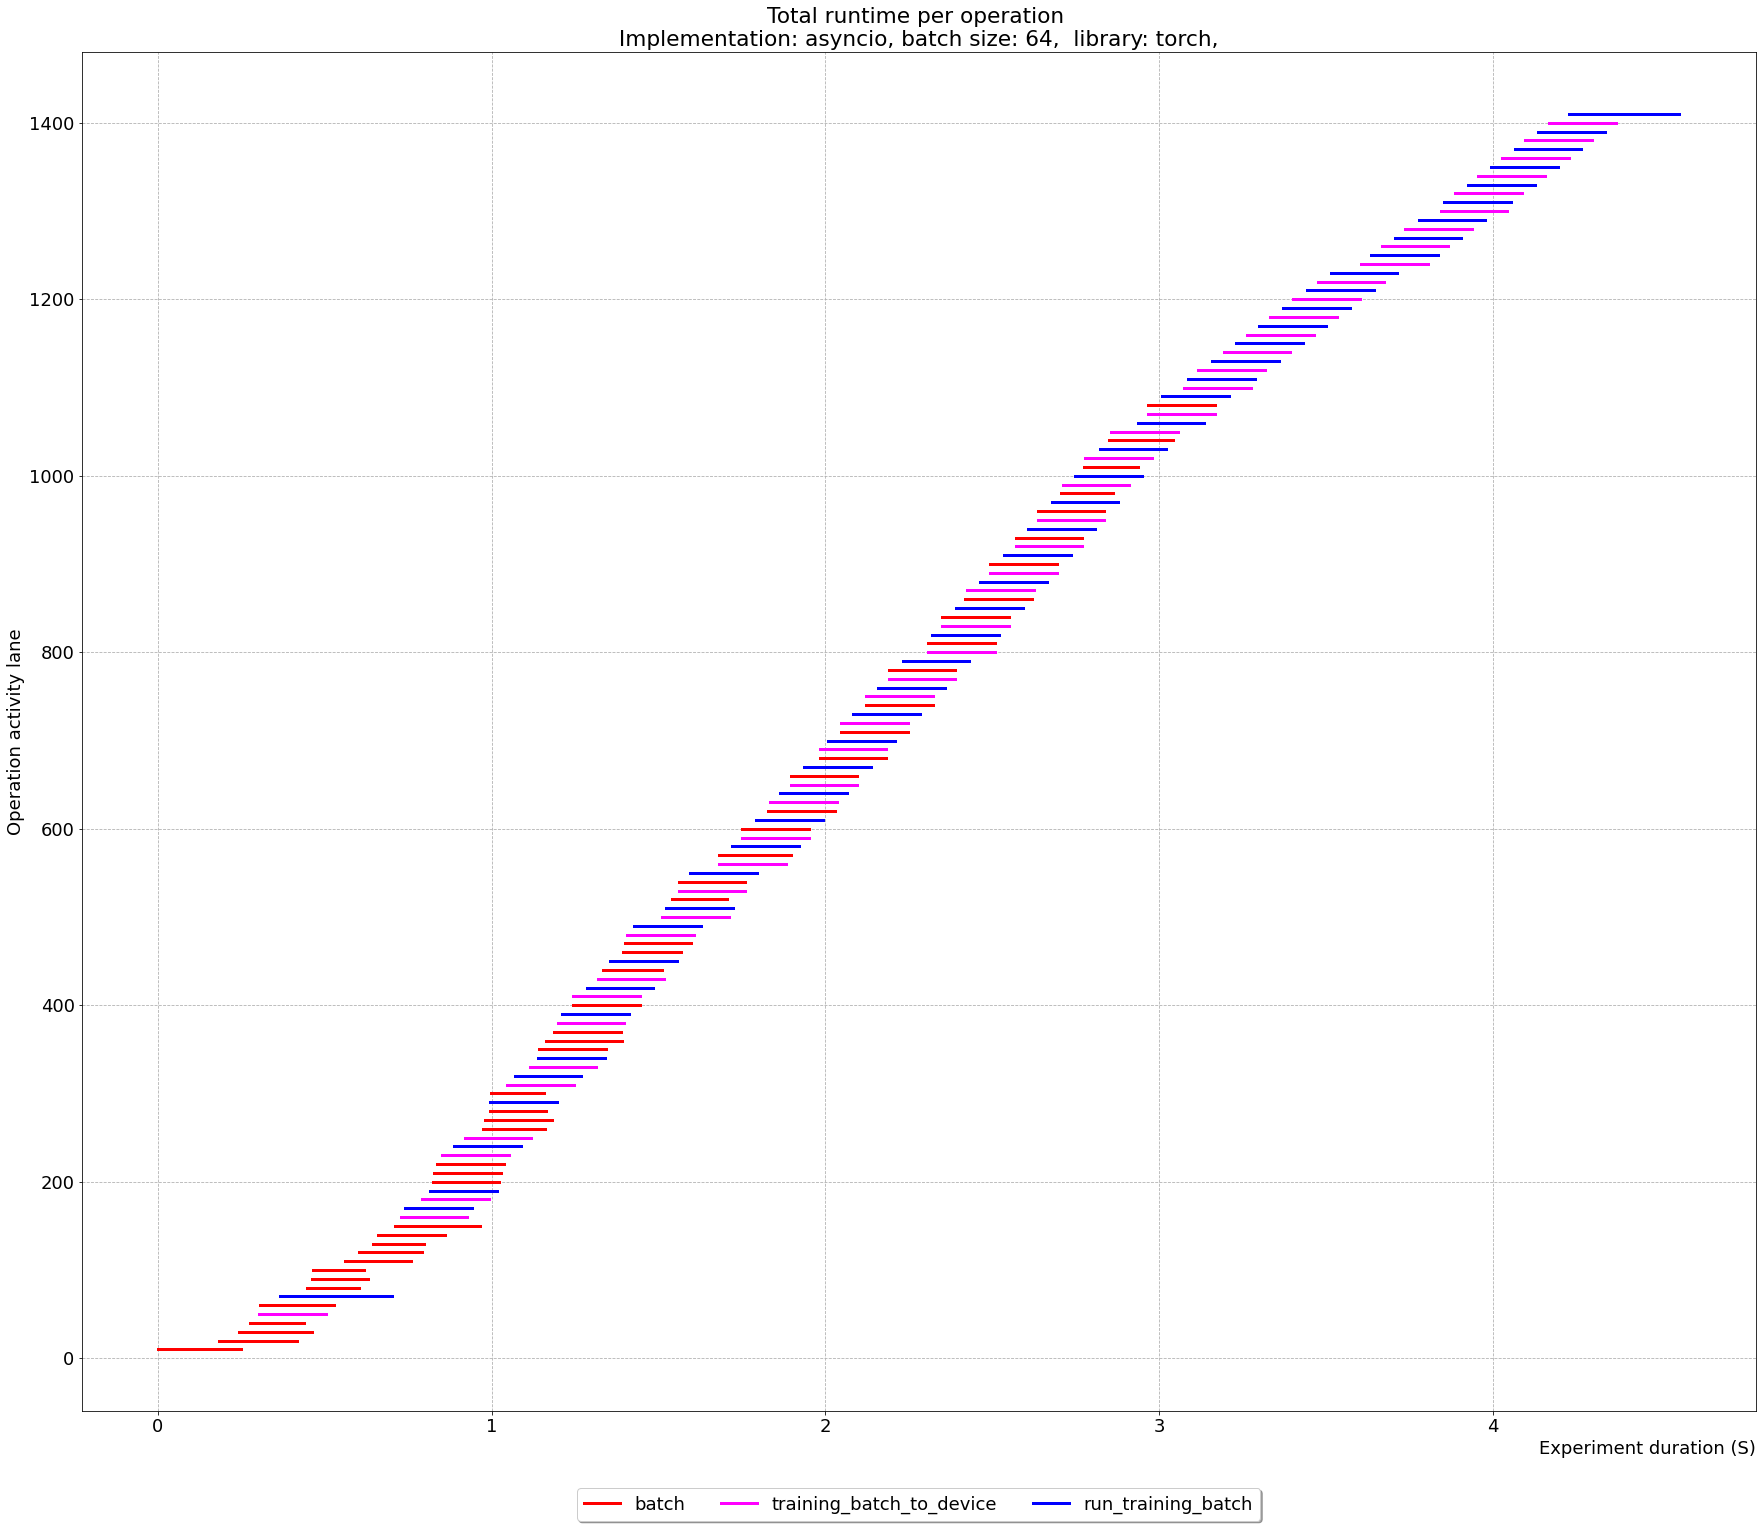

timestamp False


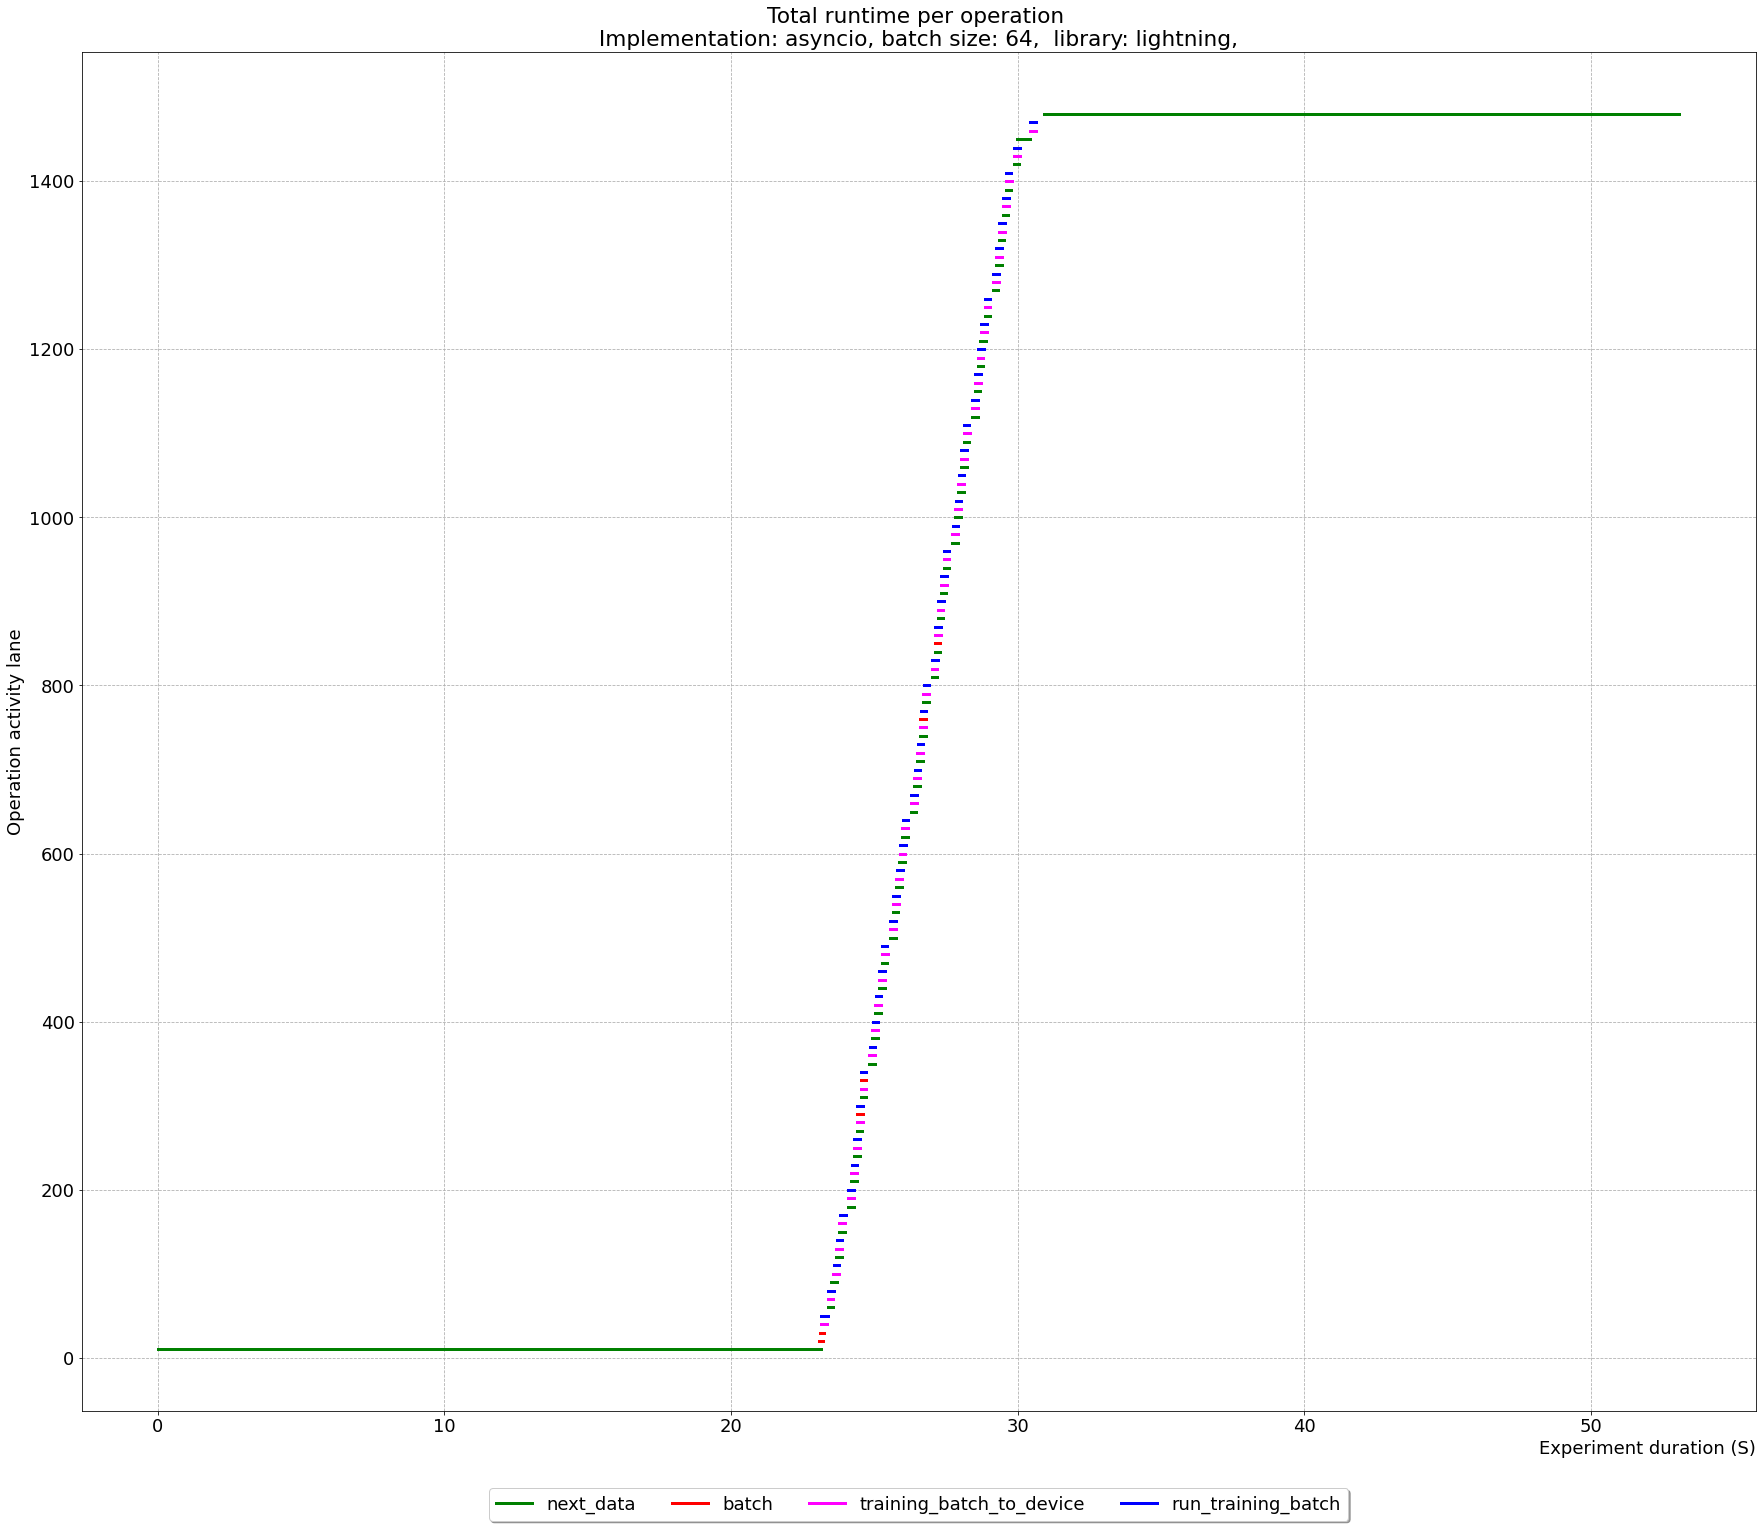

timestamp False


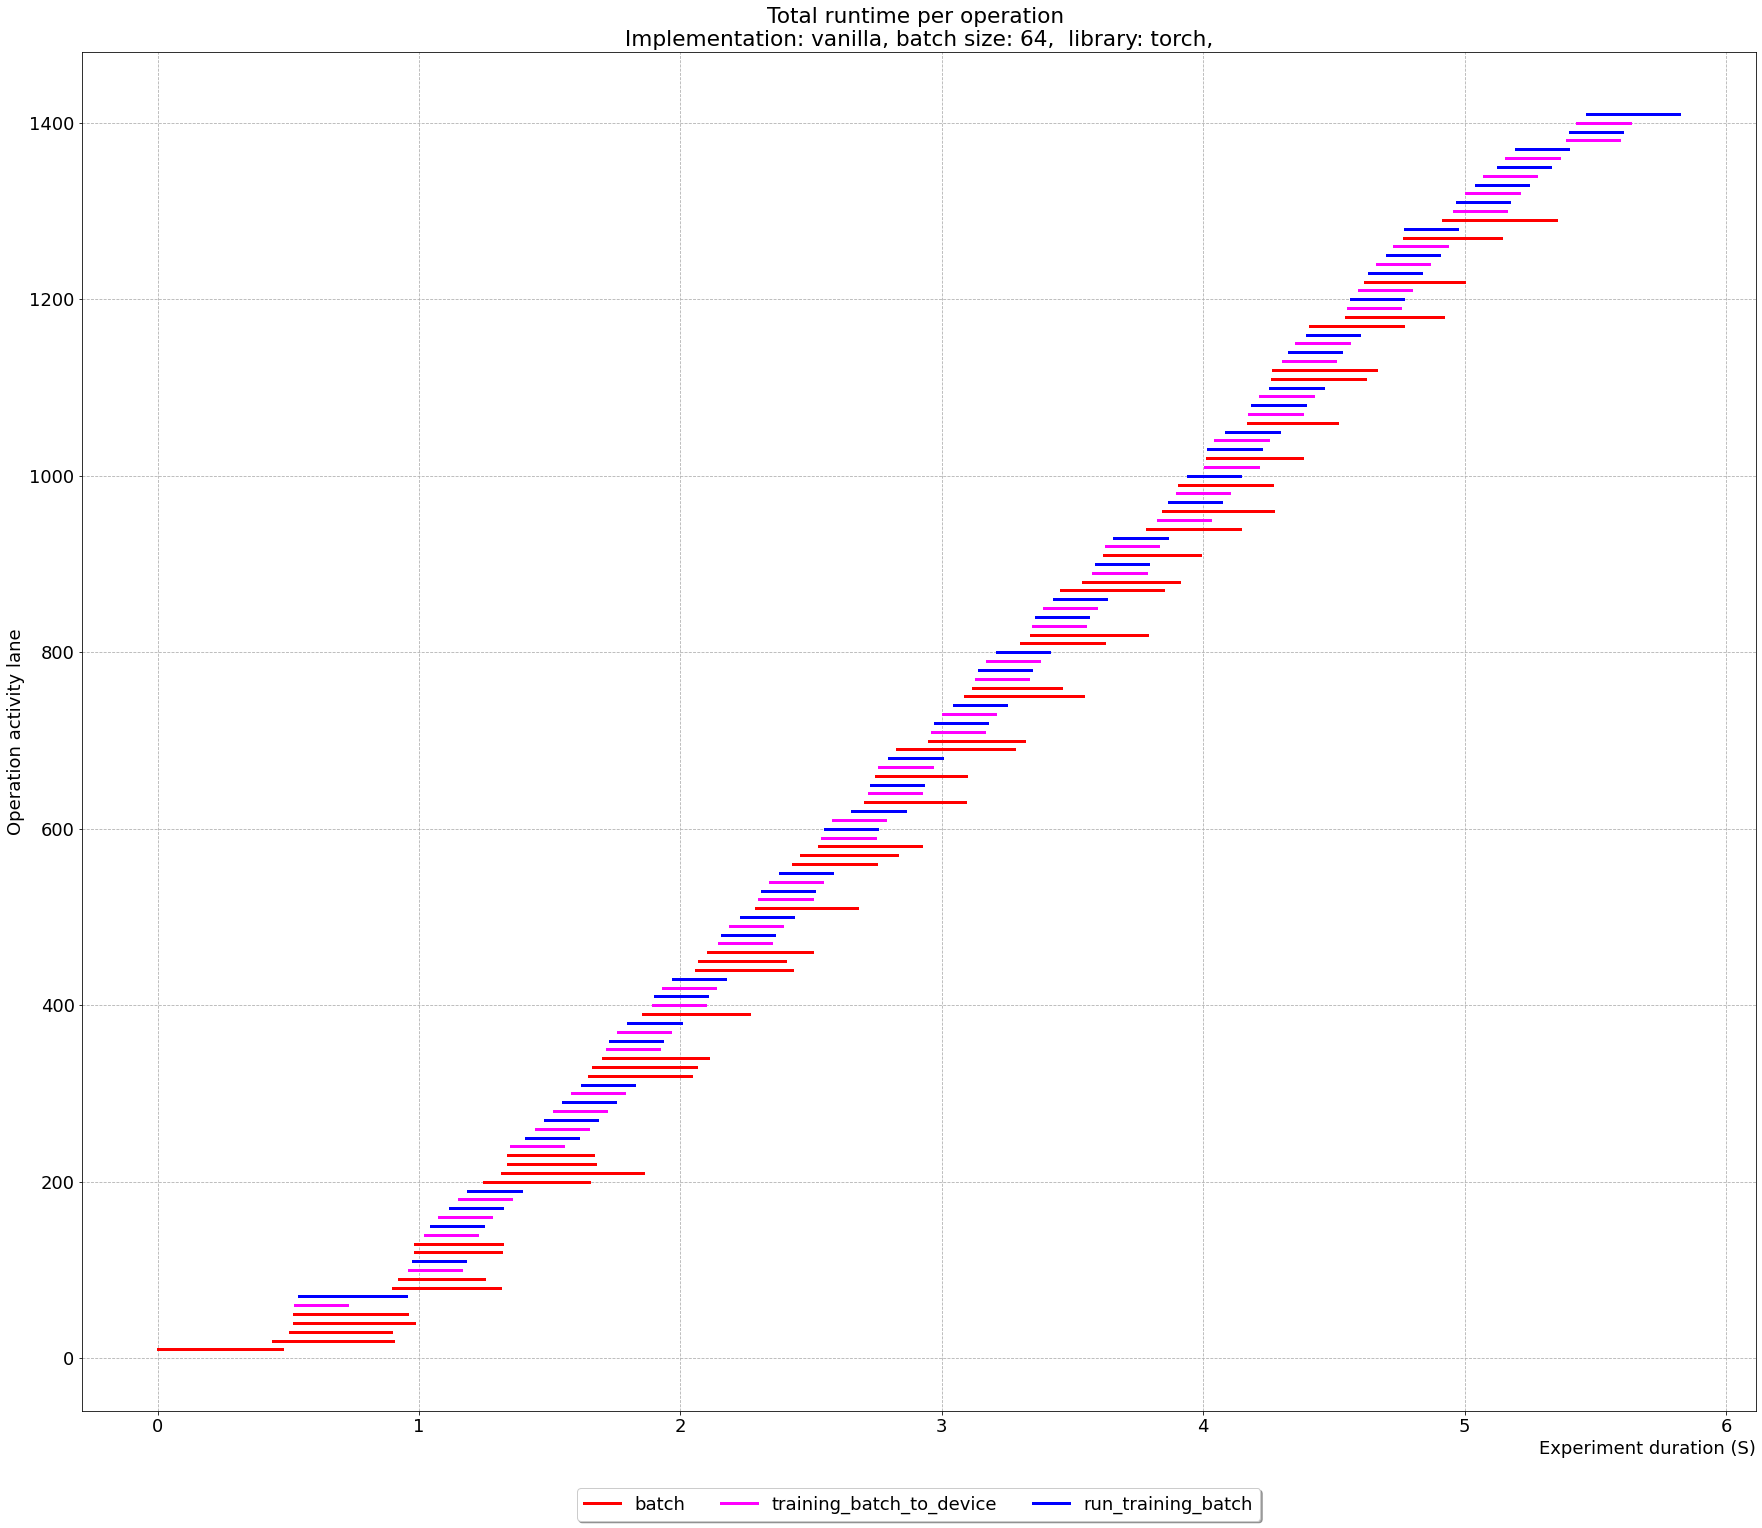

timestamp False


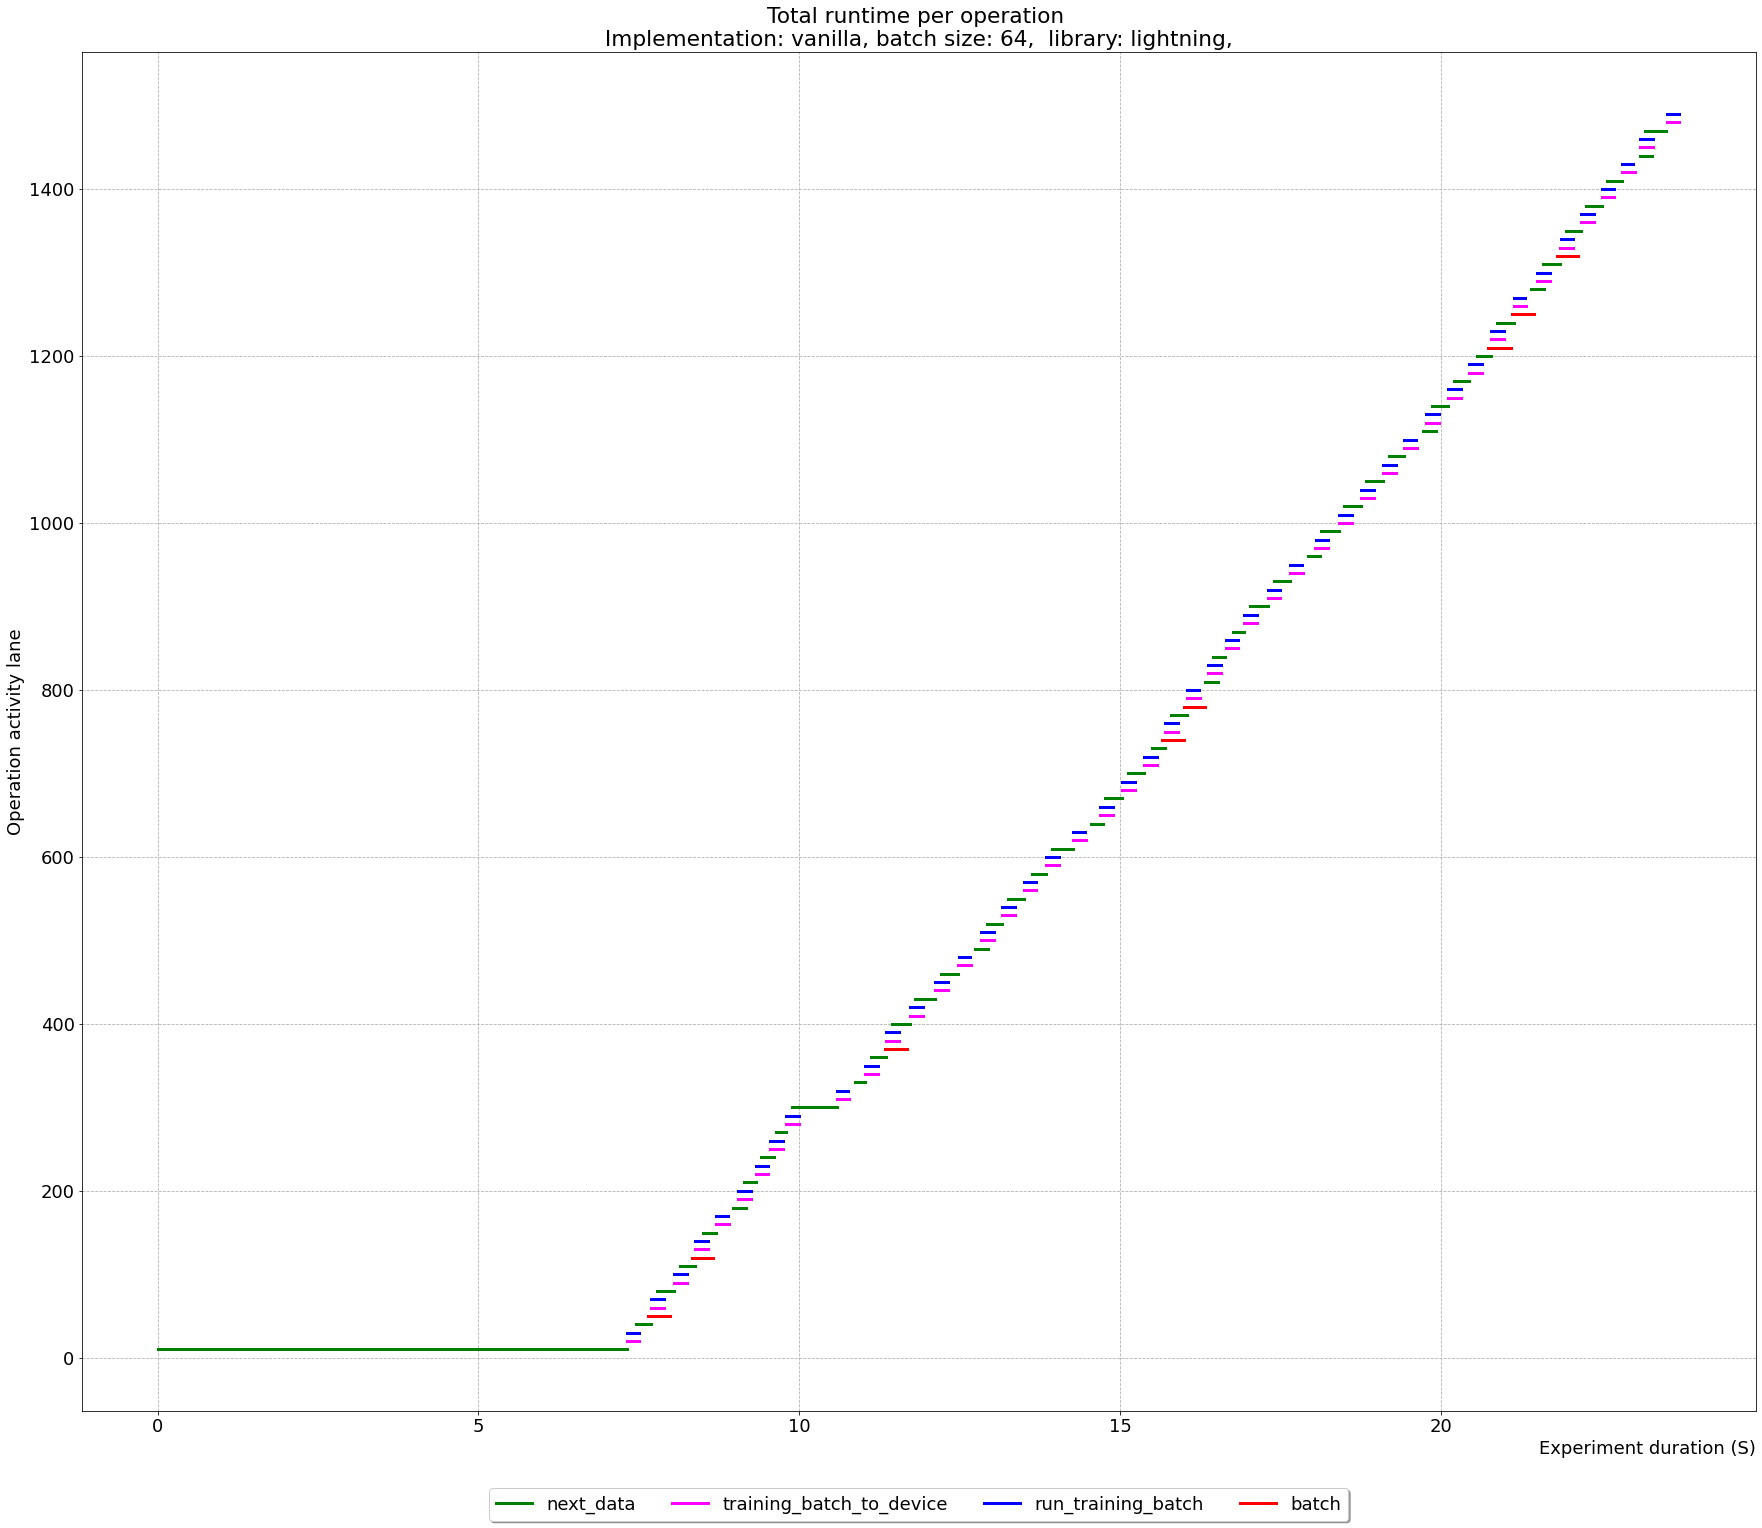

In [6]:
unique_runs_scratch, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_scratch)
returns_scratch = []

for run in sorted(unique_runs_scratch):
    df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
    dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False)
    result = show_timelines_with_gpu(df, dfgpu, lanes, colors, run, False, False, True, 2)
    result["run"]=run
    returns_scratch.append(result)

#### Timeline plots 

Each line corresponds to a unique function call.

#### GPU utilization

In [7]:
unique_runs_s3 = np.unique(df_dataloader_s3["run"])
unique_runs_scratch = np.unique(df_dataloader_scratch["run"])
print(unique_runs_s3, unique_runs_scratch)

['20211118f090621_benchmark_e2e_torch_s3_64_4_16_1_threaded_sync'
 '20211118f091616_benchmark_e2e_lightning_s3_64_4_16_1_threaded_sync'
 '20211118f093102_benchmark_e2e_torch_s3_64_4_16_1_asyncio_sync'
 '20211118f093632_benchmark_e2e_lightning_s3_64_4_16_1_asyncio_sync'
 '20211118f095018_benchmark_e2e_torch_s3_64_4_16_1_vanilla_sync'
 '20211118f095518_benchmark_e2e_lightning_s3_64_4_16_1_vanilla_sync'] ['20211118f092349_benchmark_e2e_torch_scratch_64_4_16_1_threaded_sync'
 '20211118f092535_benchmark_e2e_lightning_scratch_64_4_16_1_threaded_sync'
 '20211118f094356_benchmark_e2e_torch_scratch_64_4_16_1_asyncio_sync'
 '20211118f094455_benchmark_e2e_lightning_scratch_64_4_16_1_asyncio_sync'
 '20211118f105618_benchmark_e2e_torch_scratch_64_4_16_1_vanilla_sync'
 '20211118f105735_benchmark_e2e_lightning_scratch_64_4_16_1_vanilla_sync']


timestamp False
45.14141414141414 28.337078651685392


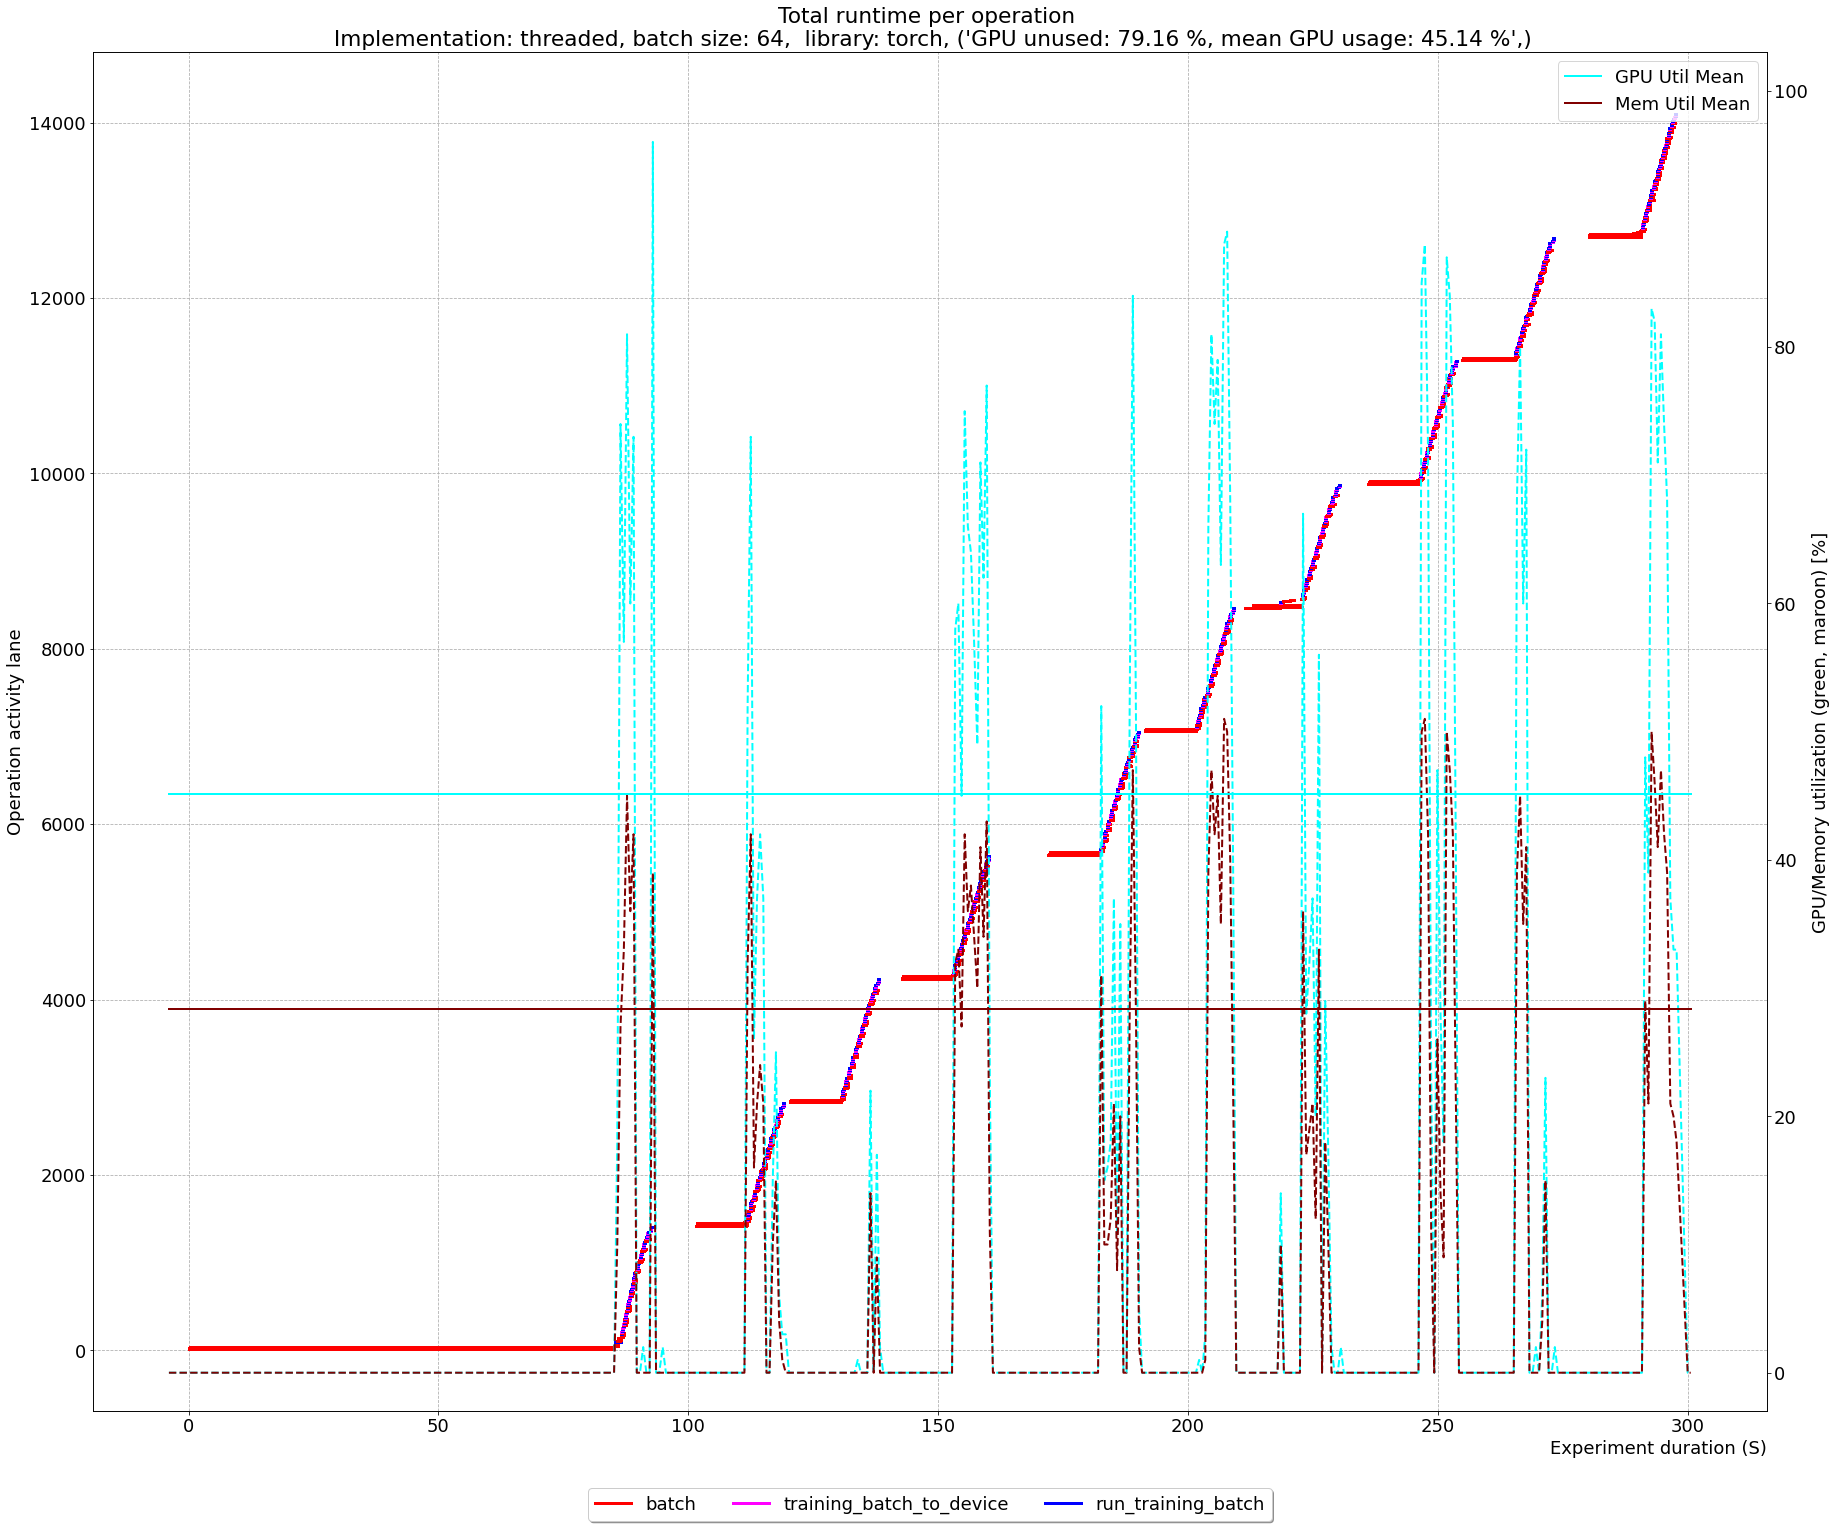

timestamp False
42.037593984962406 14.75


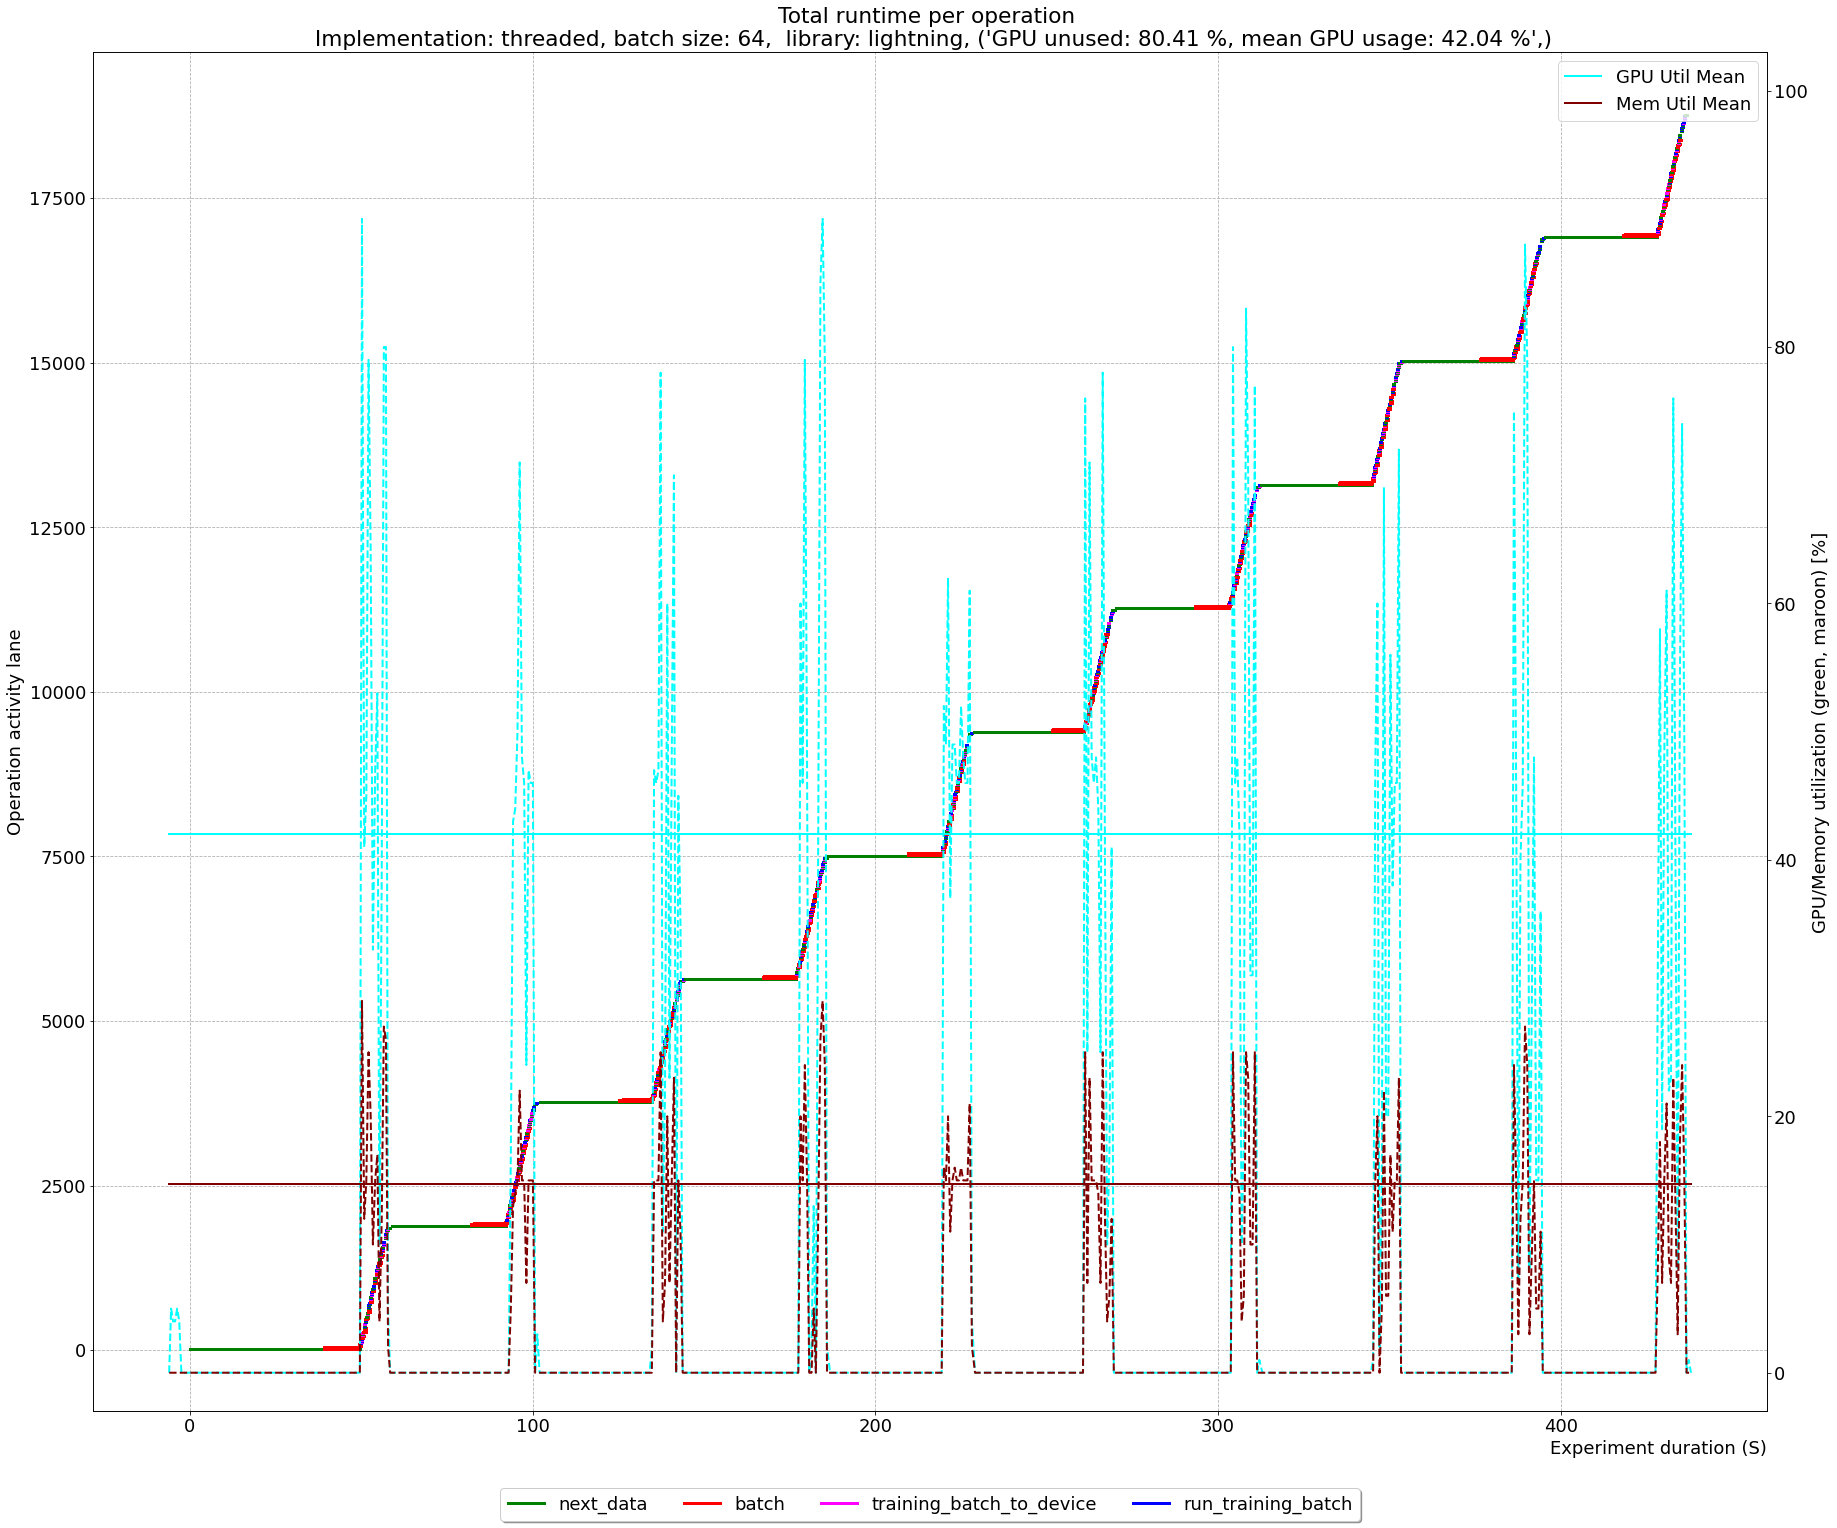

timestamp False
36.27058823529412 24.554054054054053


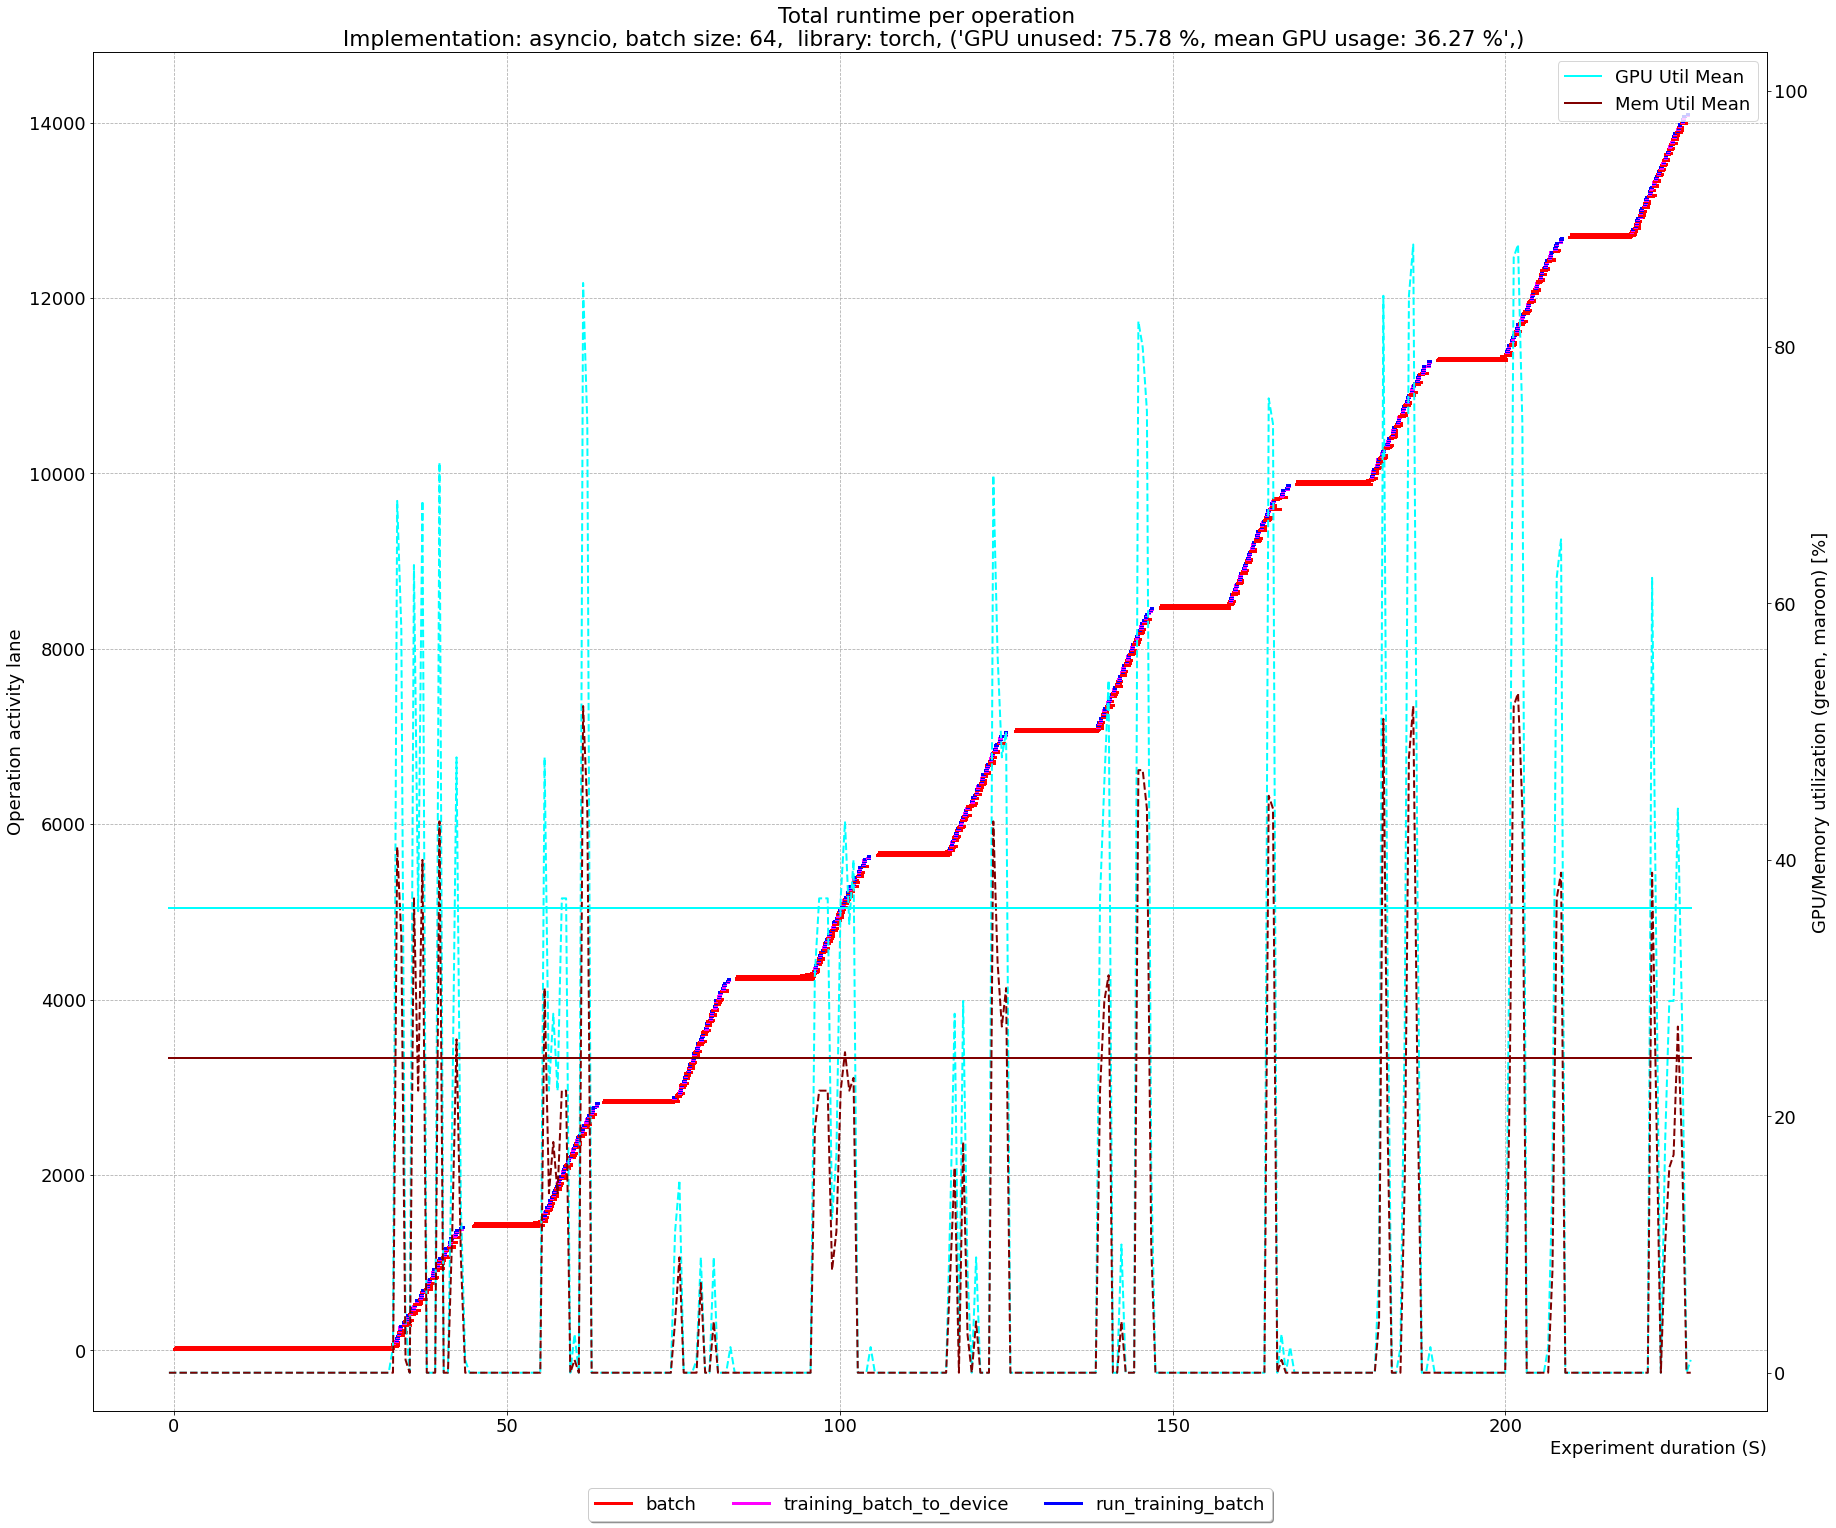

timestamp False
39.678082191780824 13.544117647058824


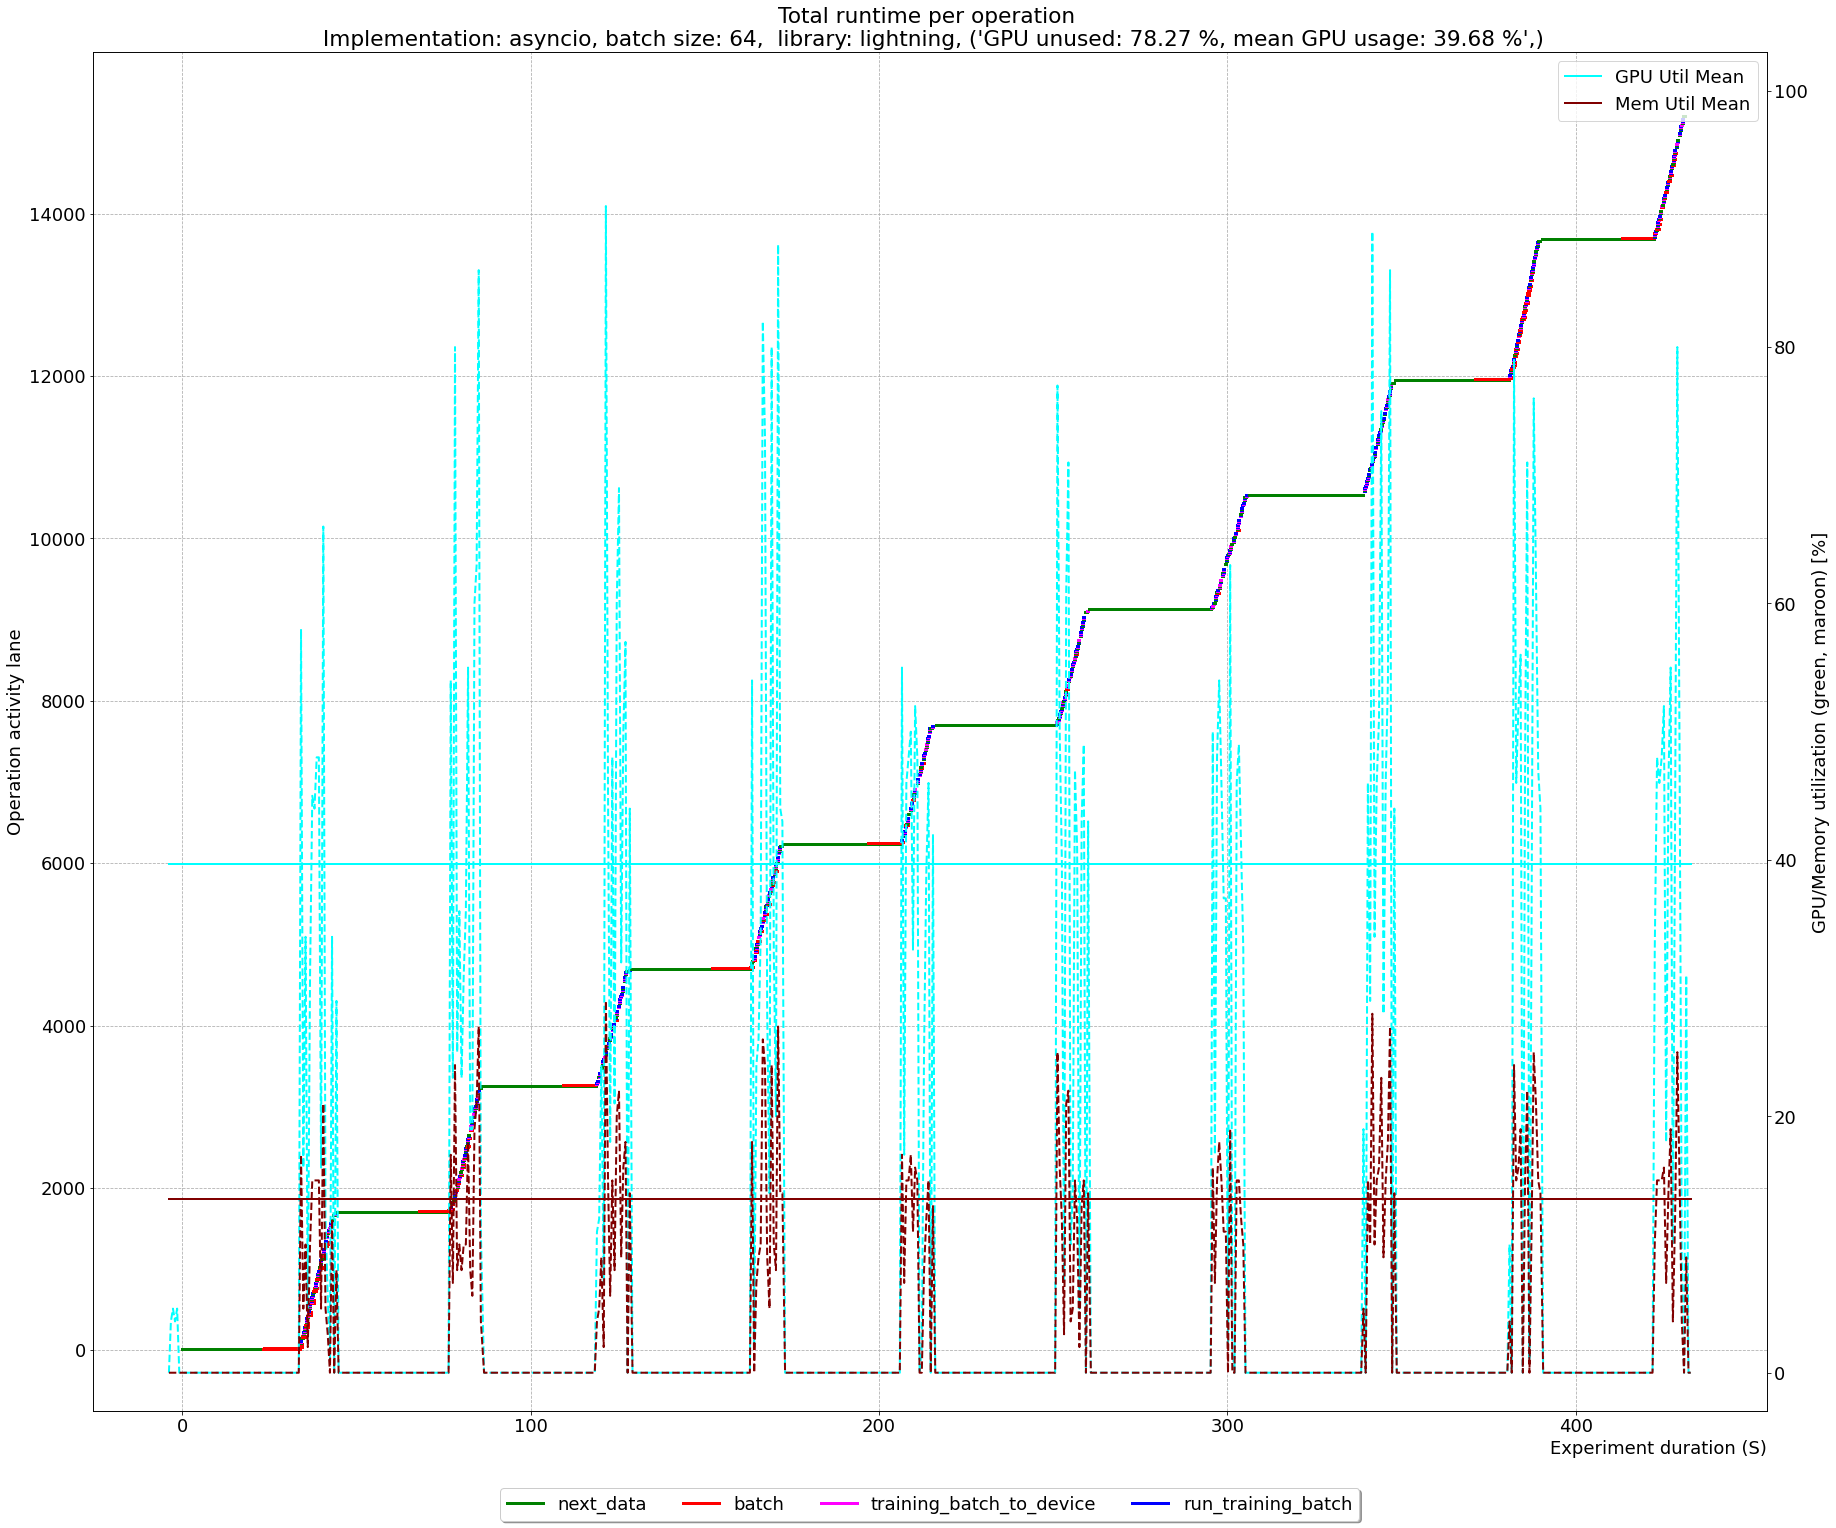

timestamp False
44.16949152542373 25.666666666666668


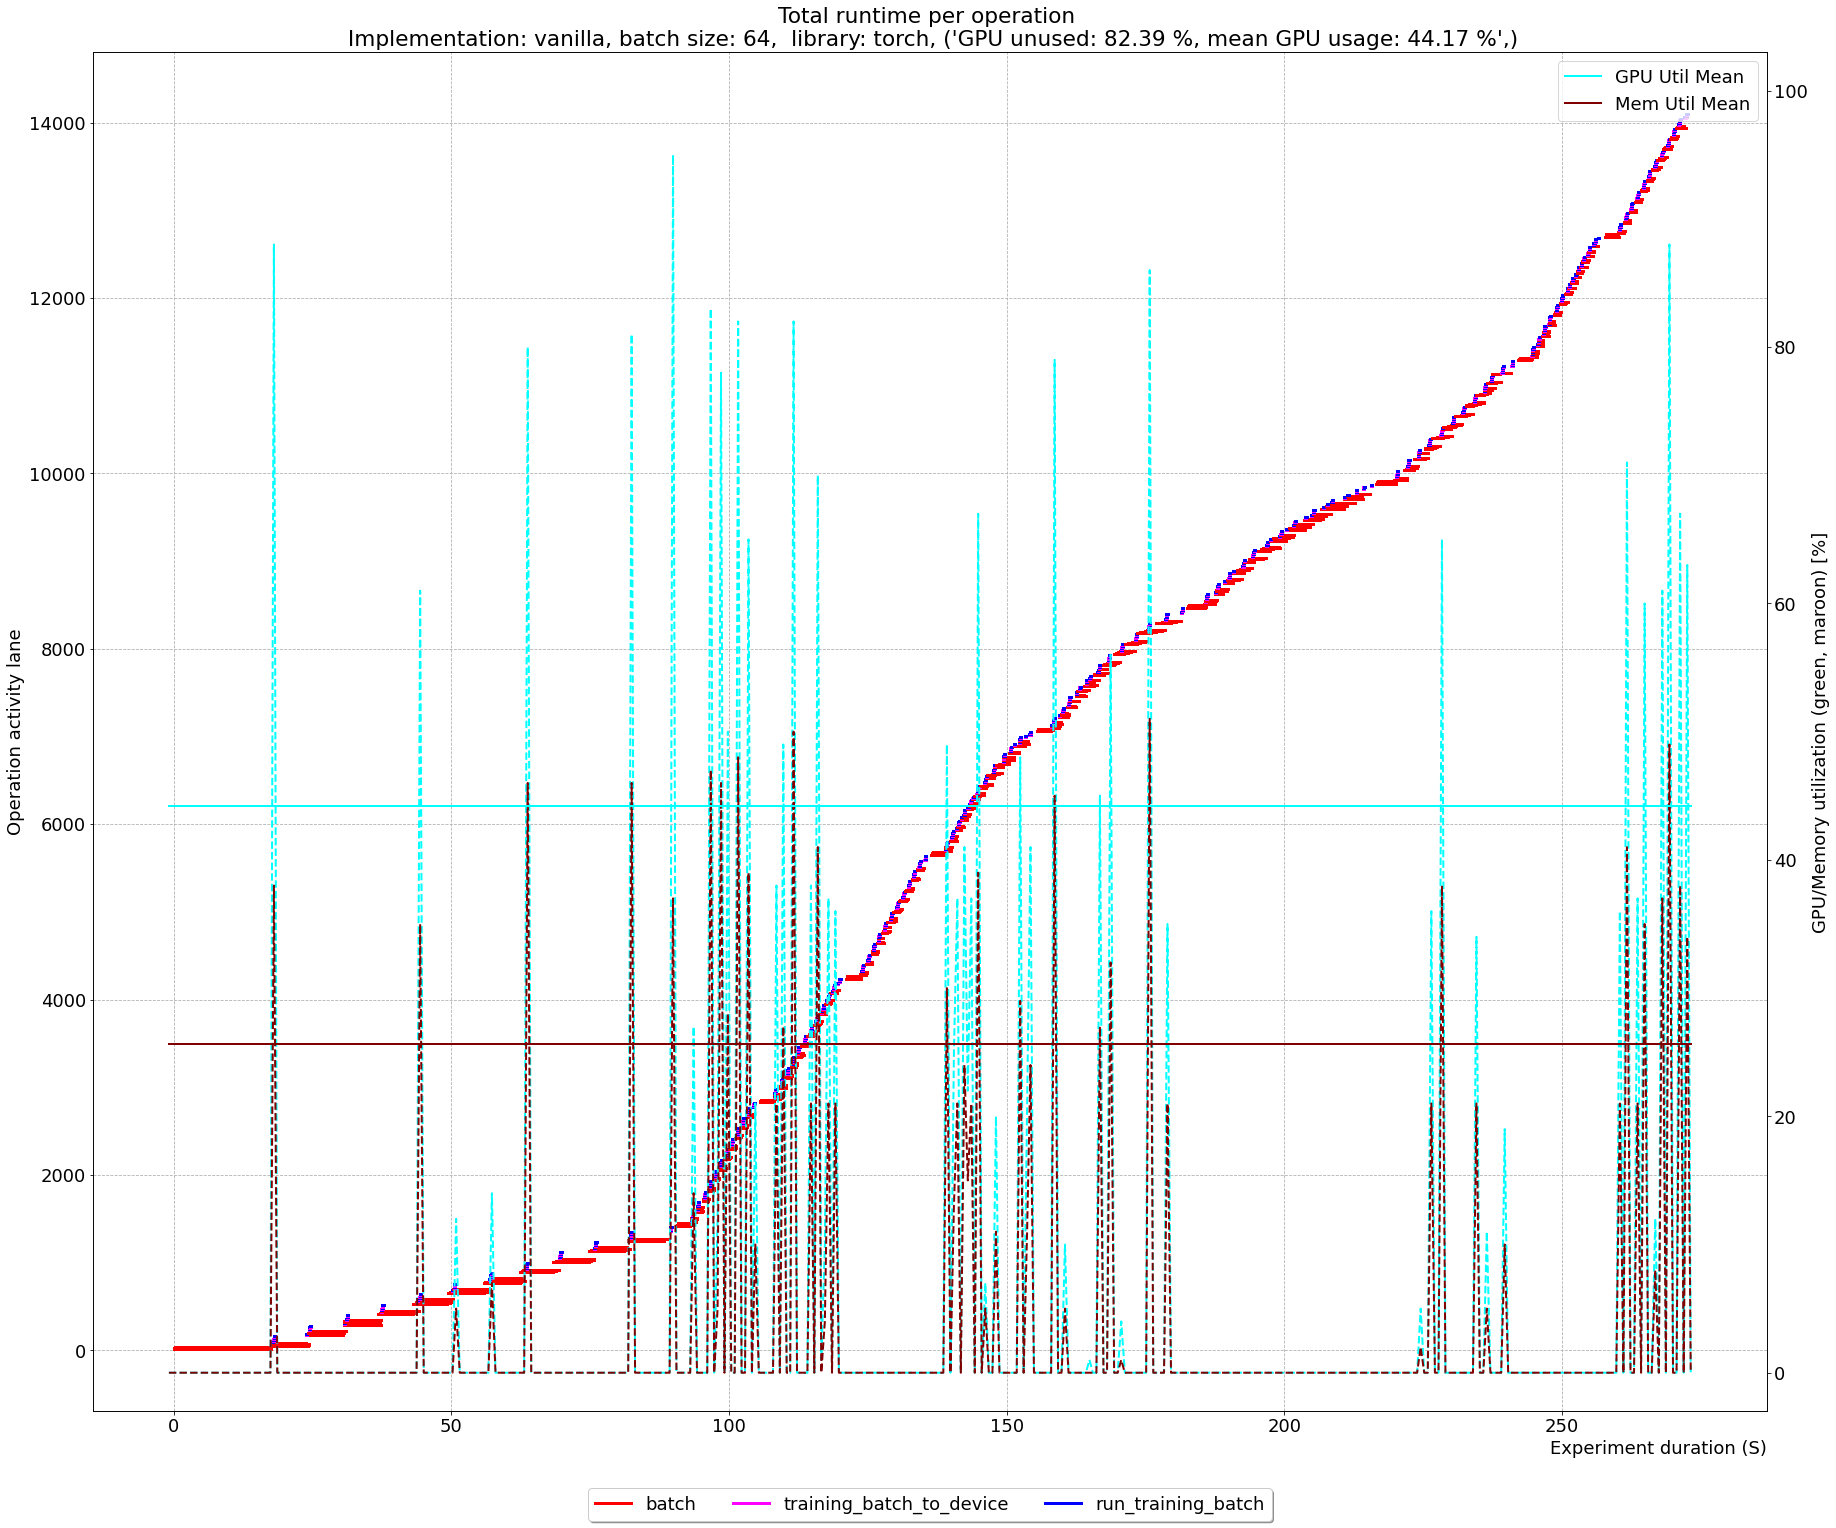

timestamp False
29.679425837320576 10.32972972972973


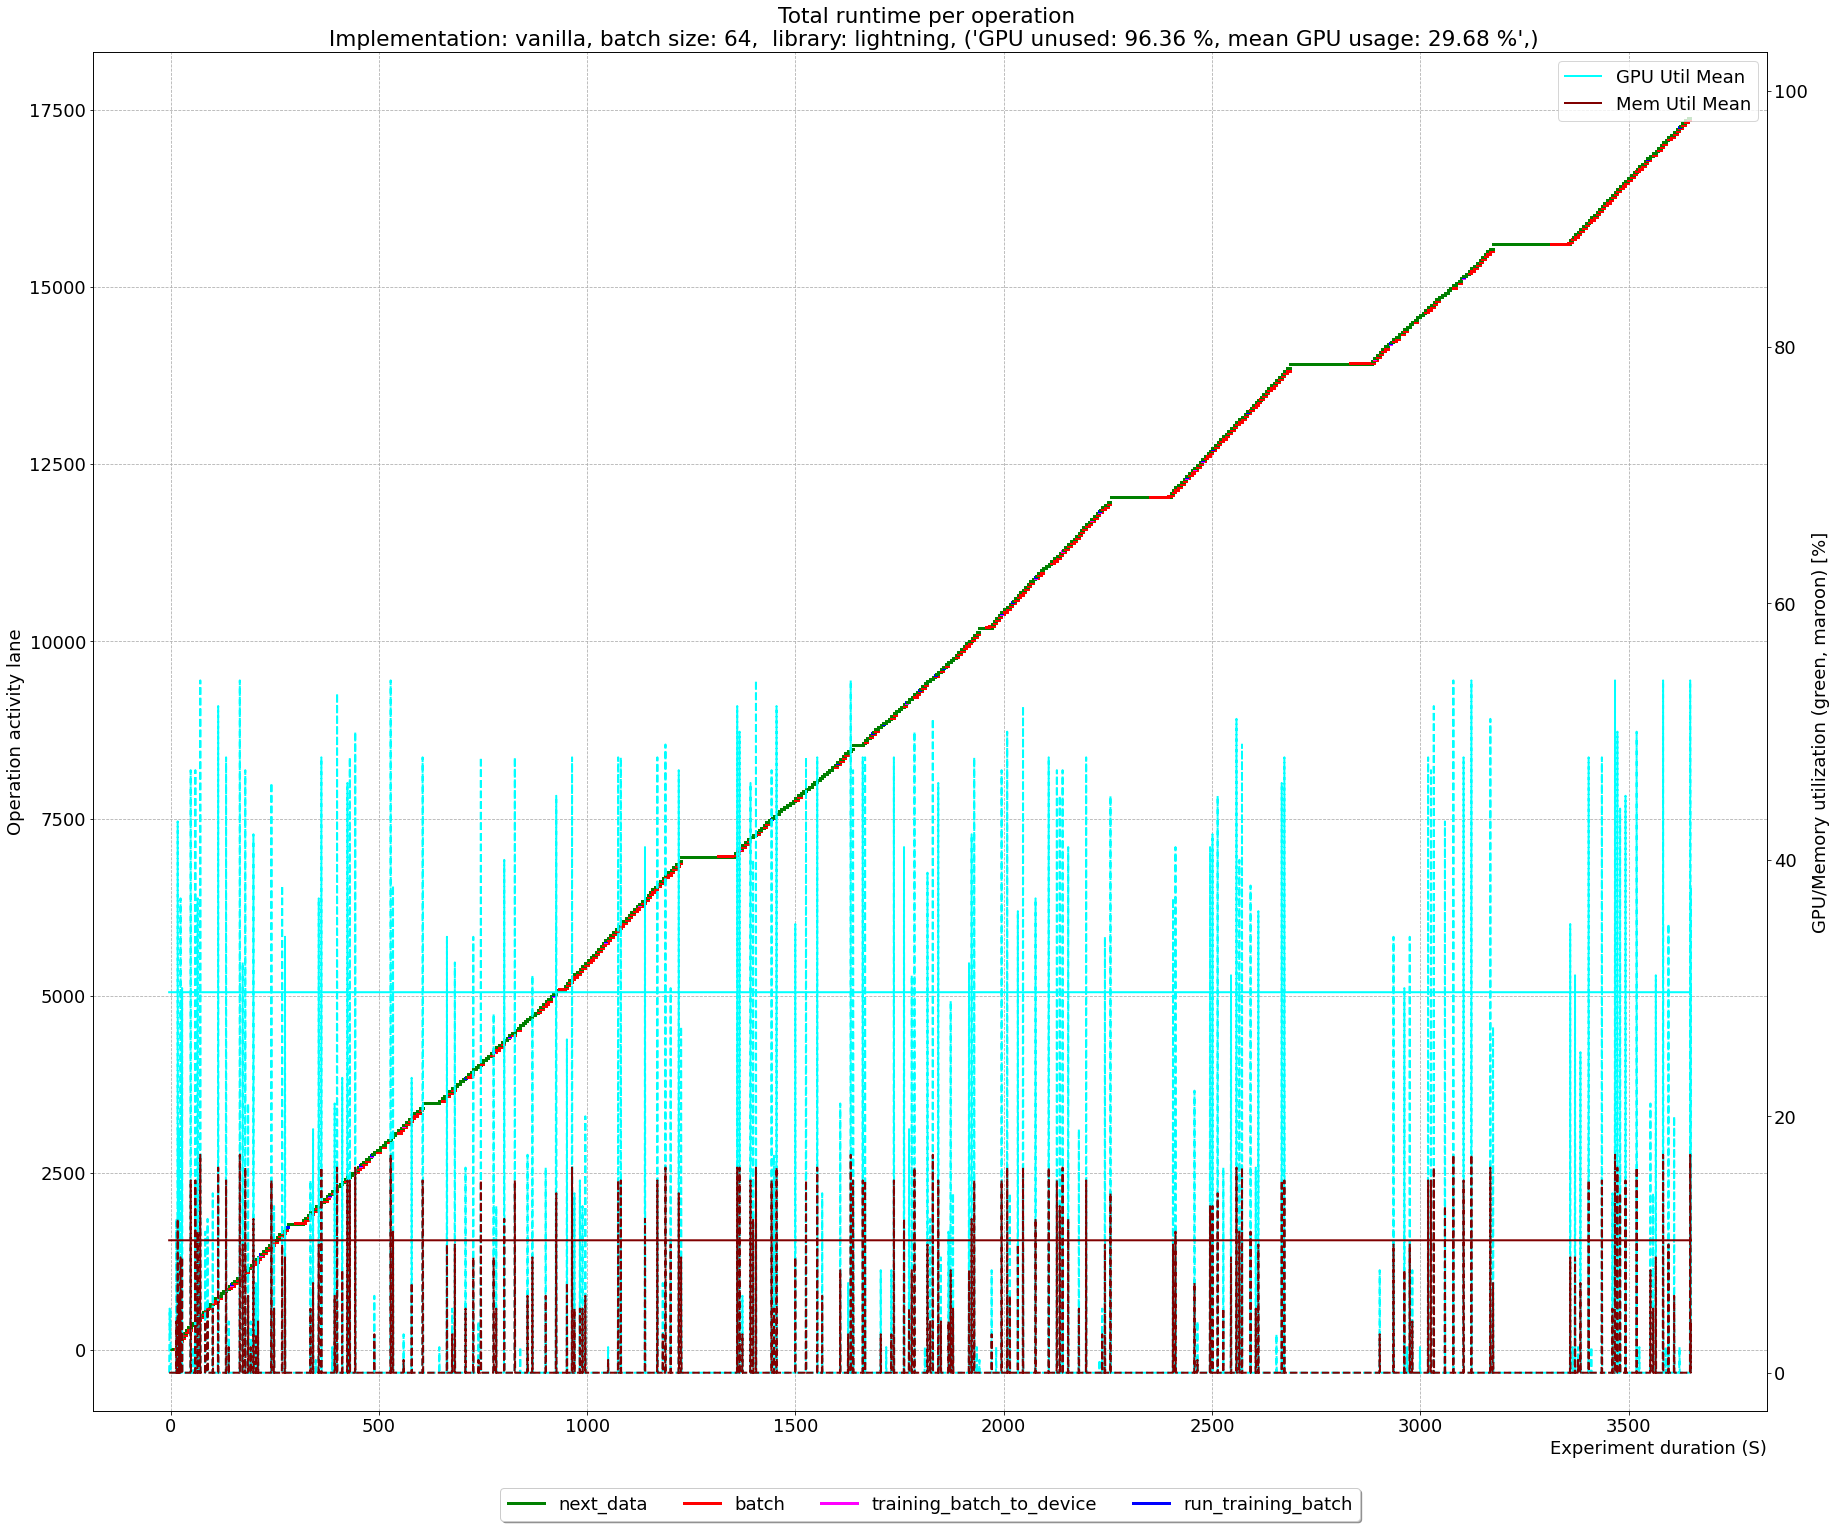

In [12]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)
returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=False)
    result["run"]=run
    returns_s3.append(result)

timestamp False
45.14141414141414 28.337078651685392


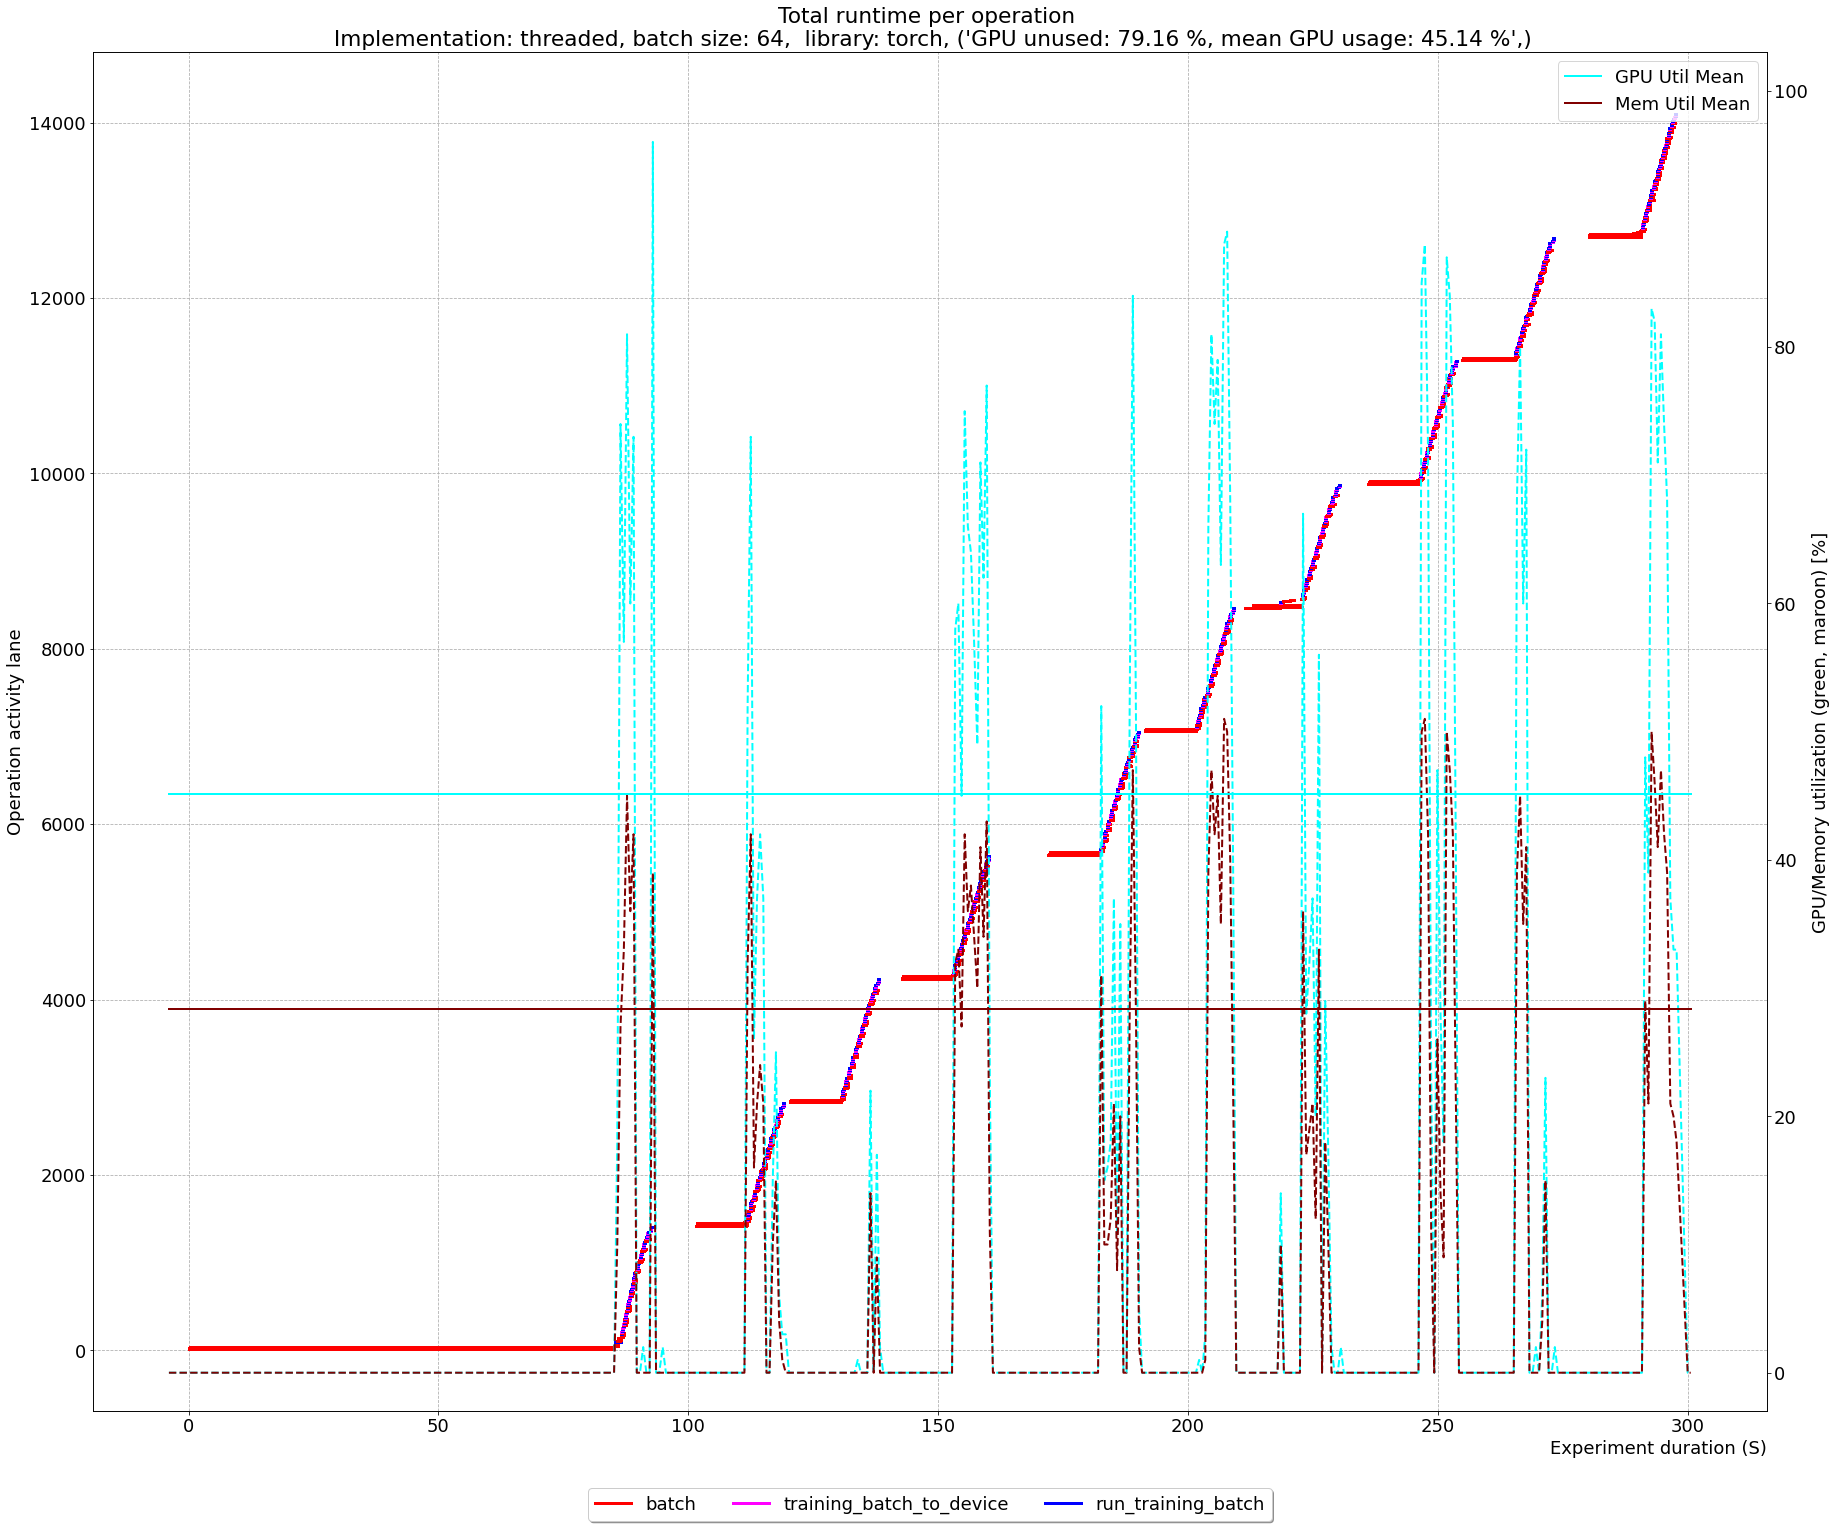

timestamp False
42.037593984962406 14.75


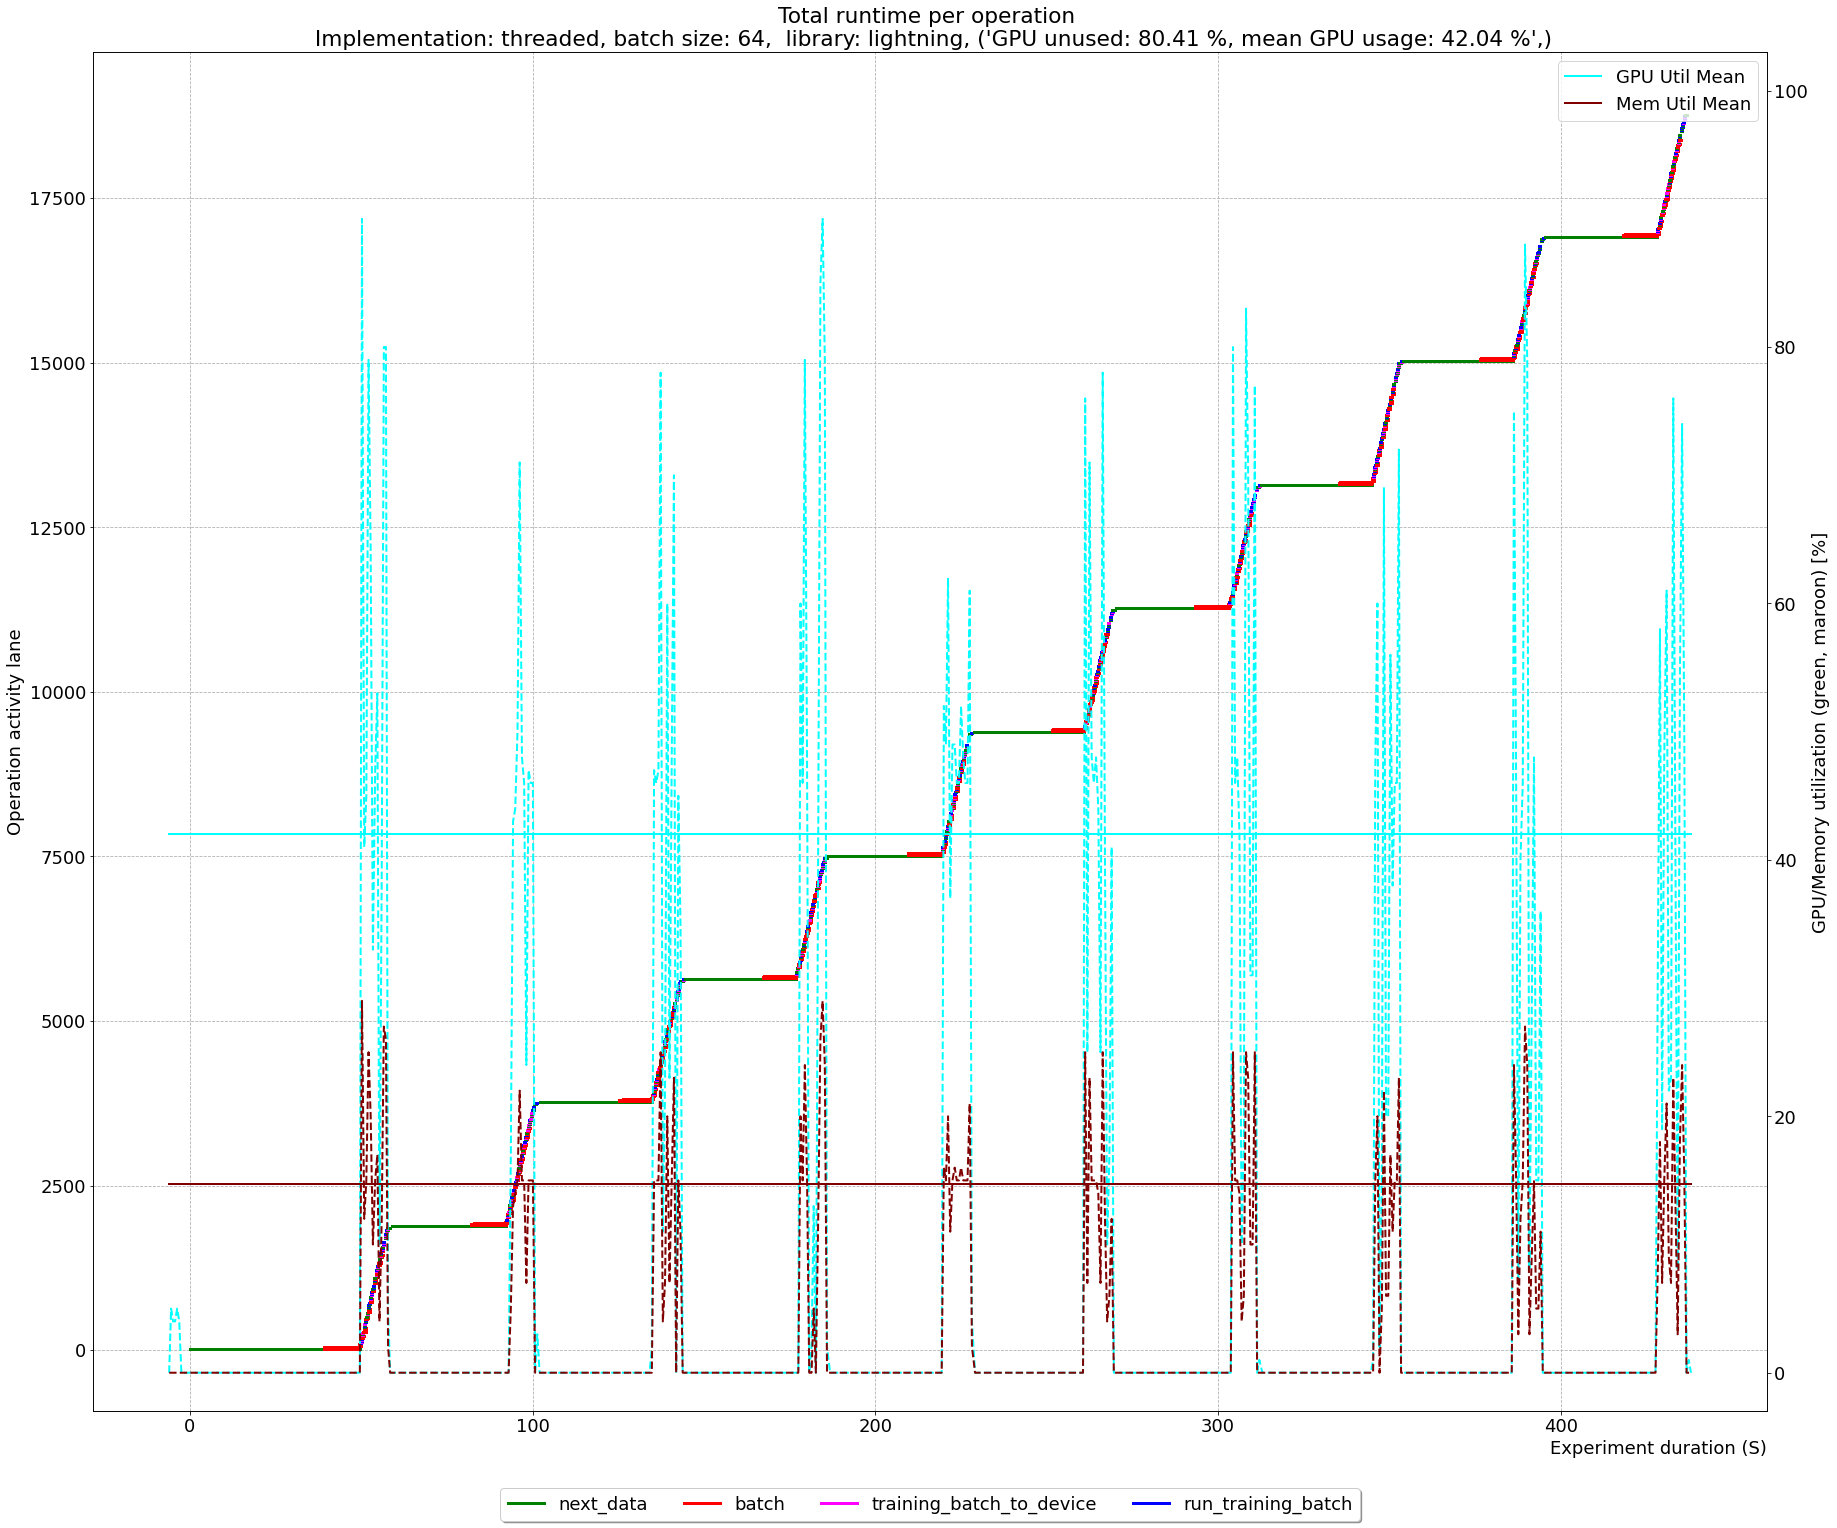

timestamp False
36.27058823529412 24.554054054054053


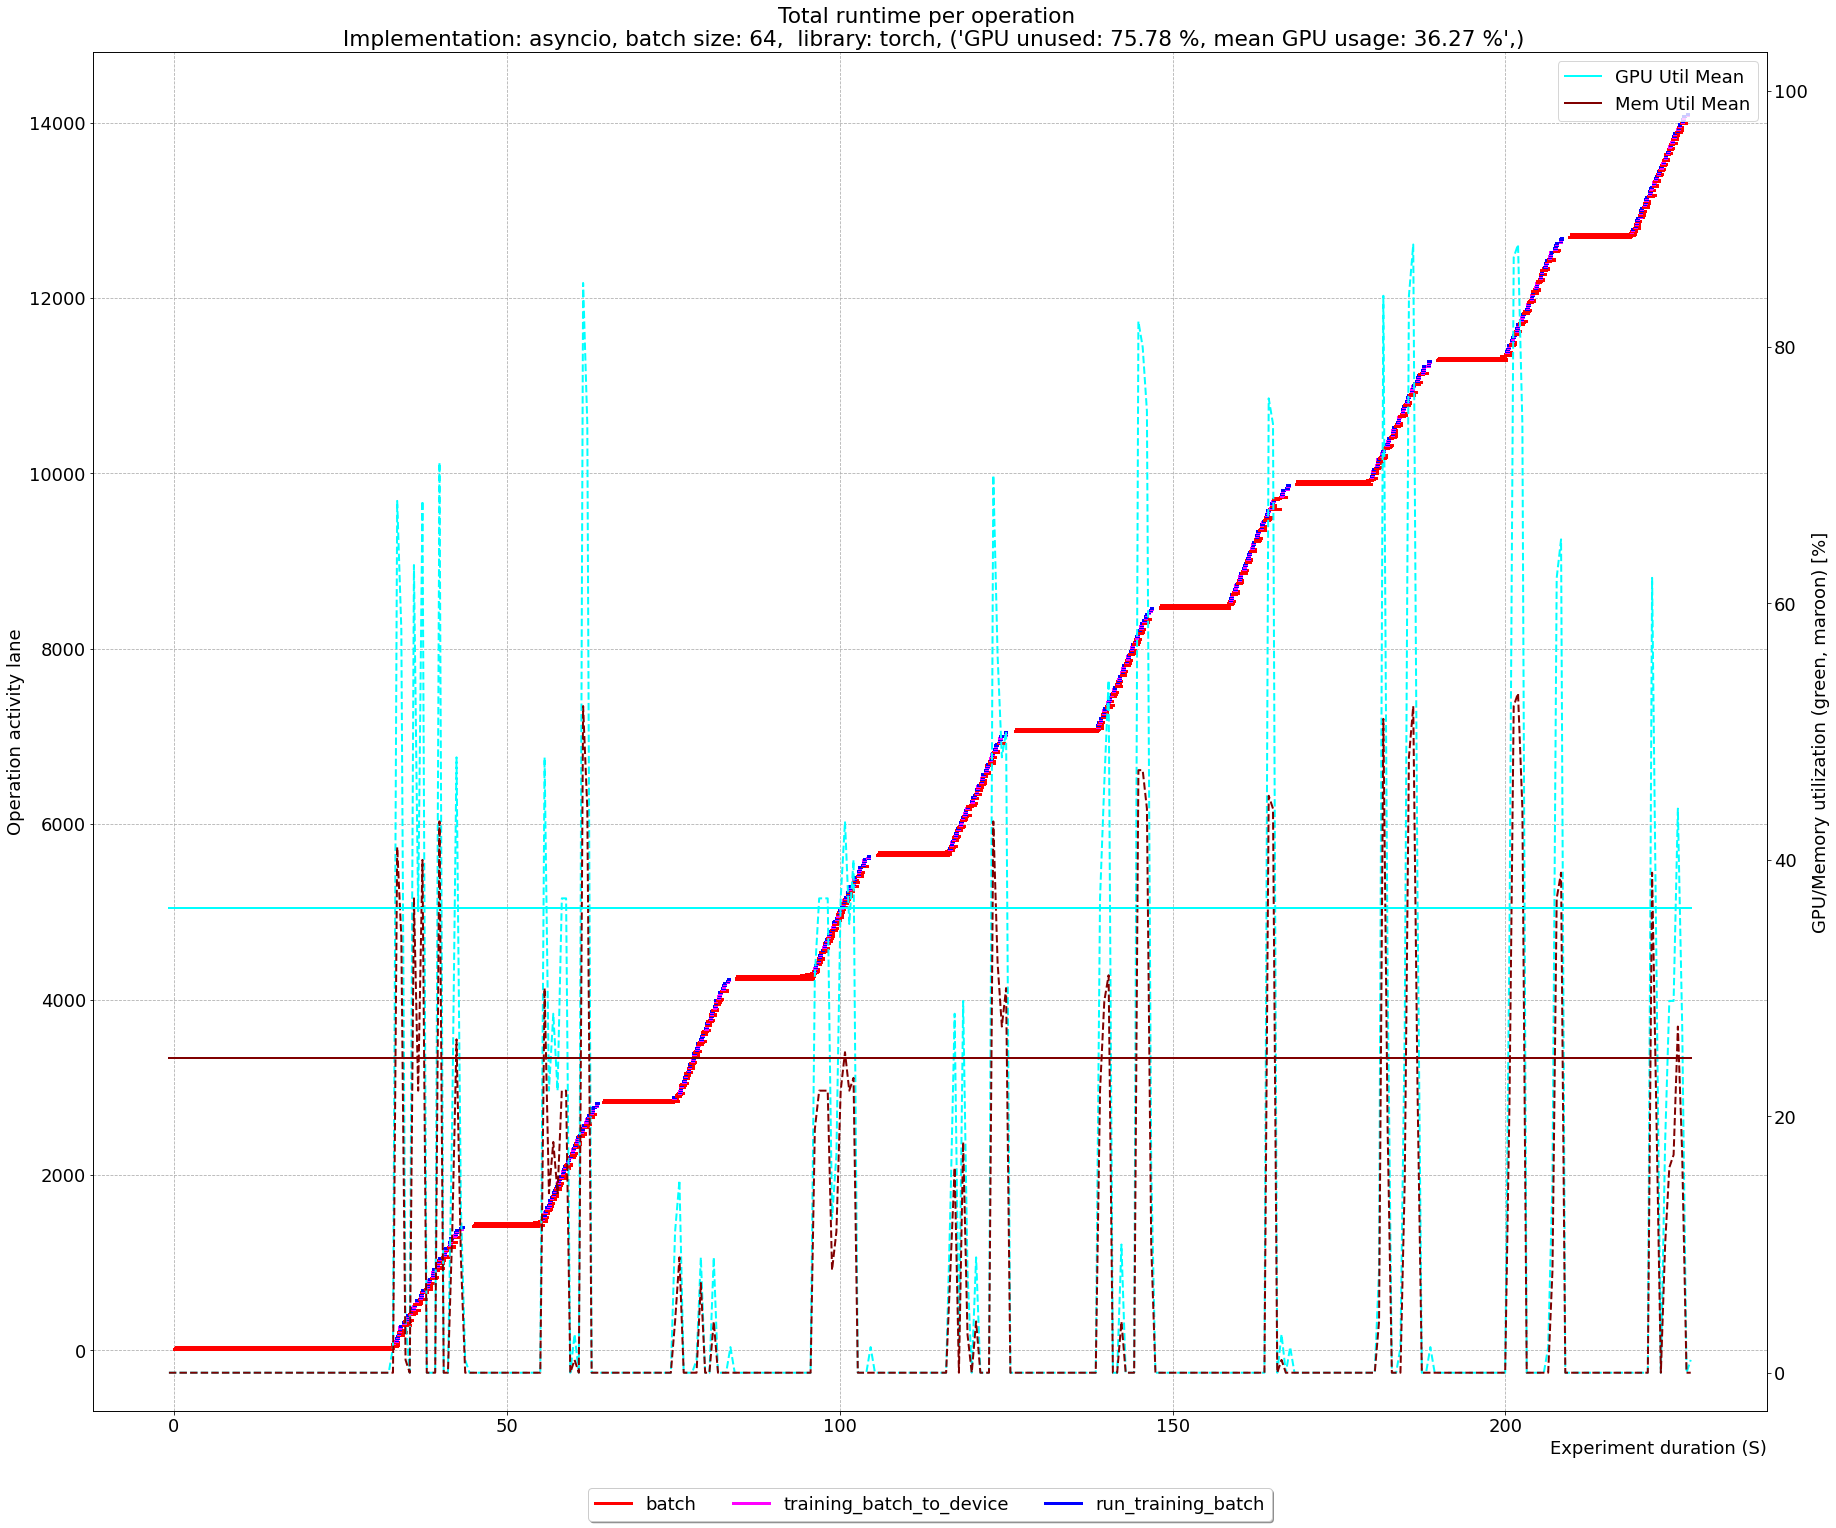

timestamp False
39.678082191780824 13.544117647058824


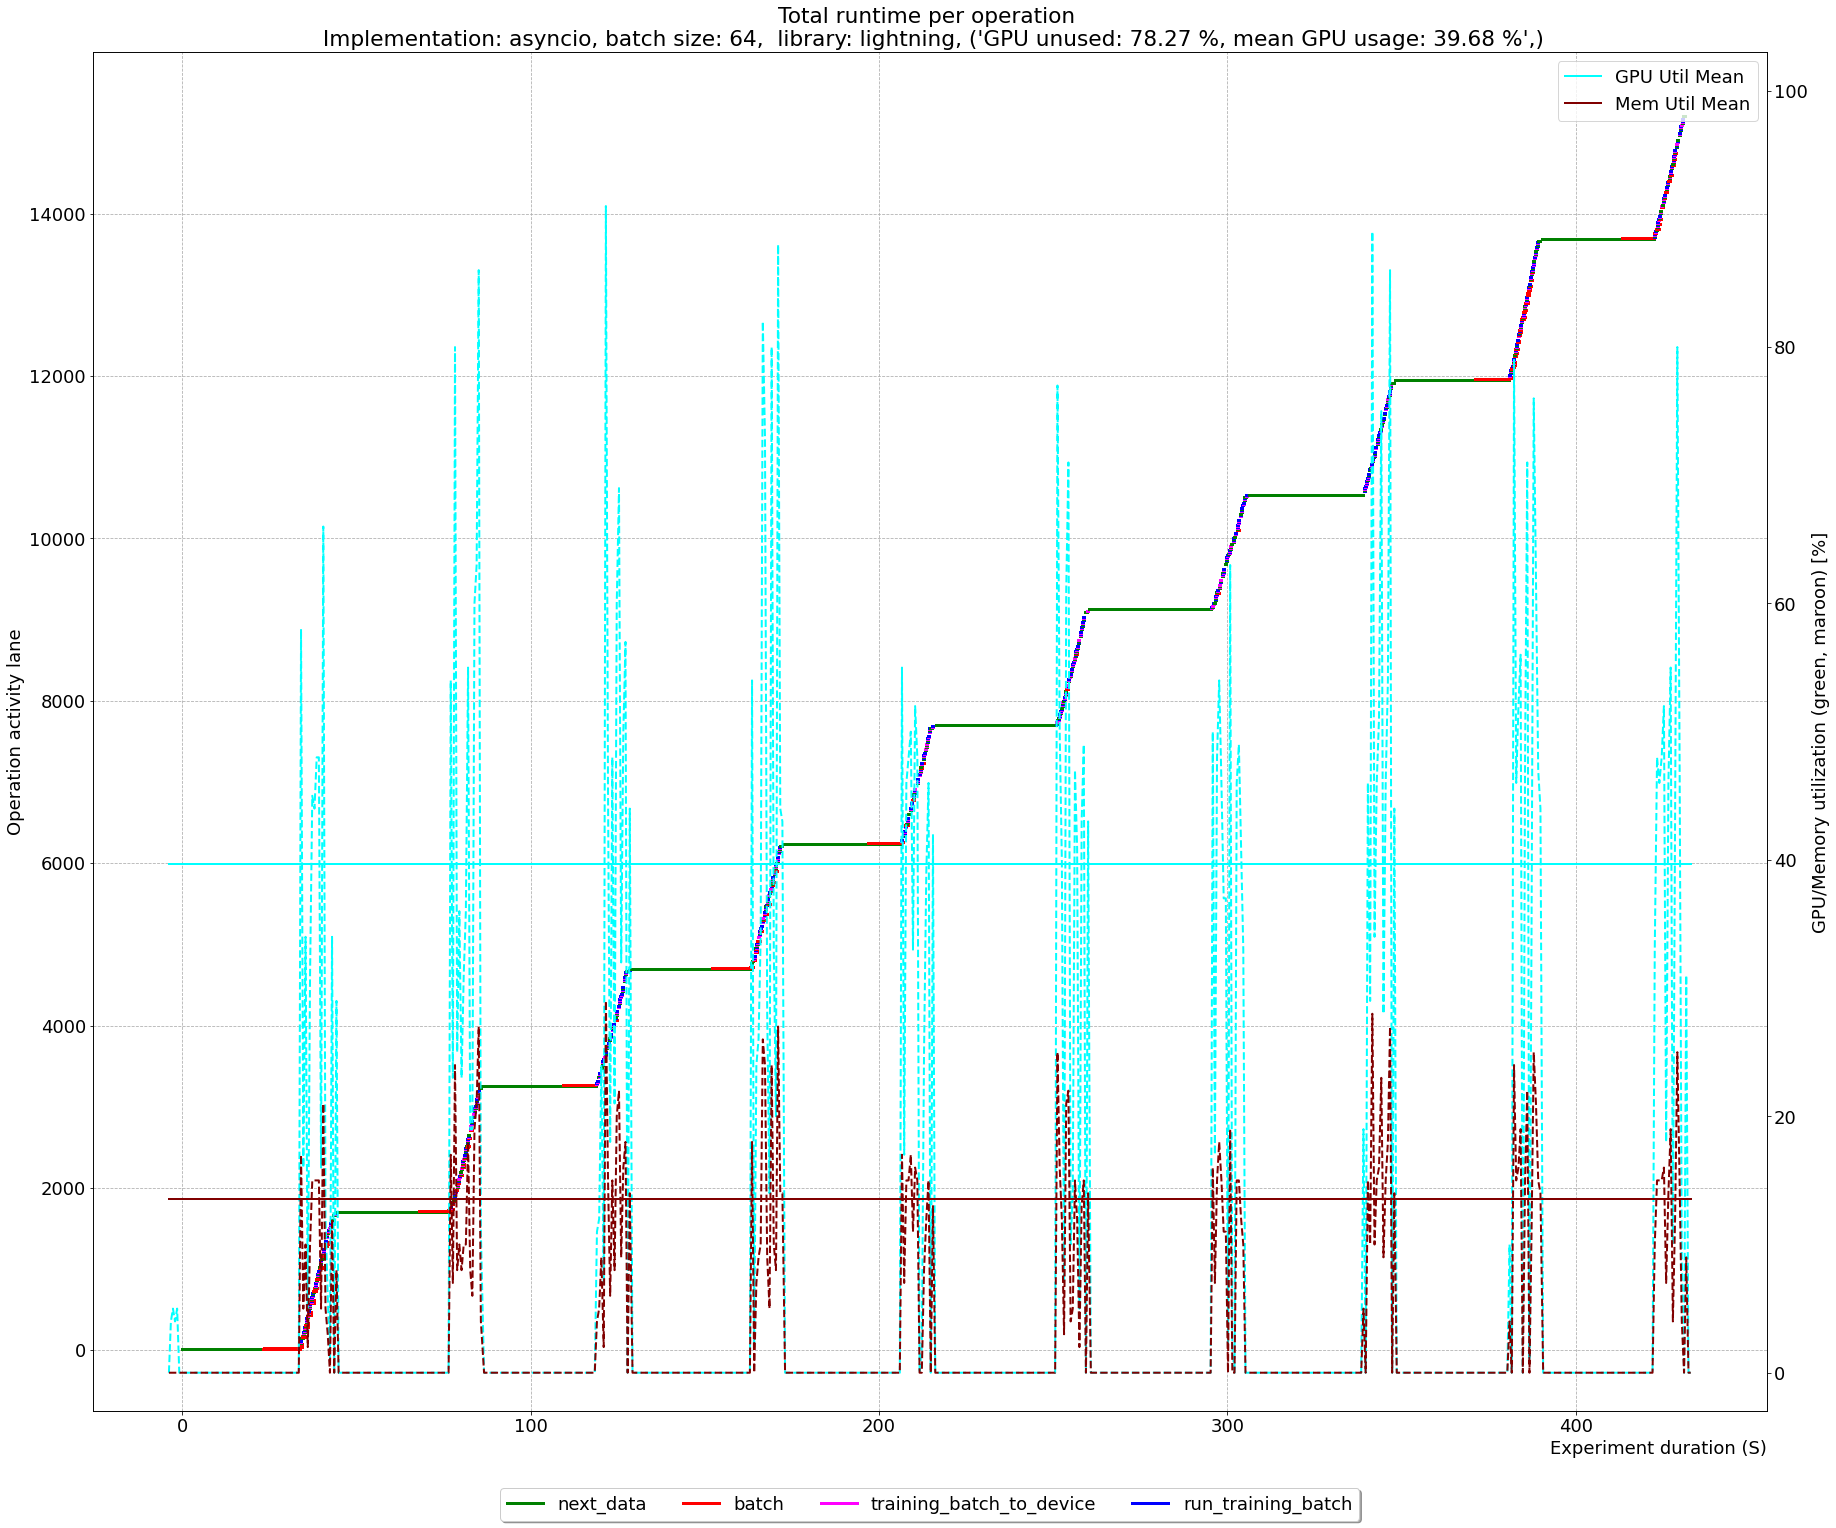

timestamp False
44.16949152542373 25.666666666666668


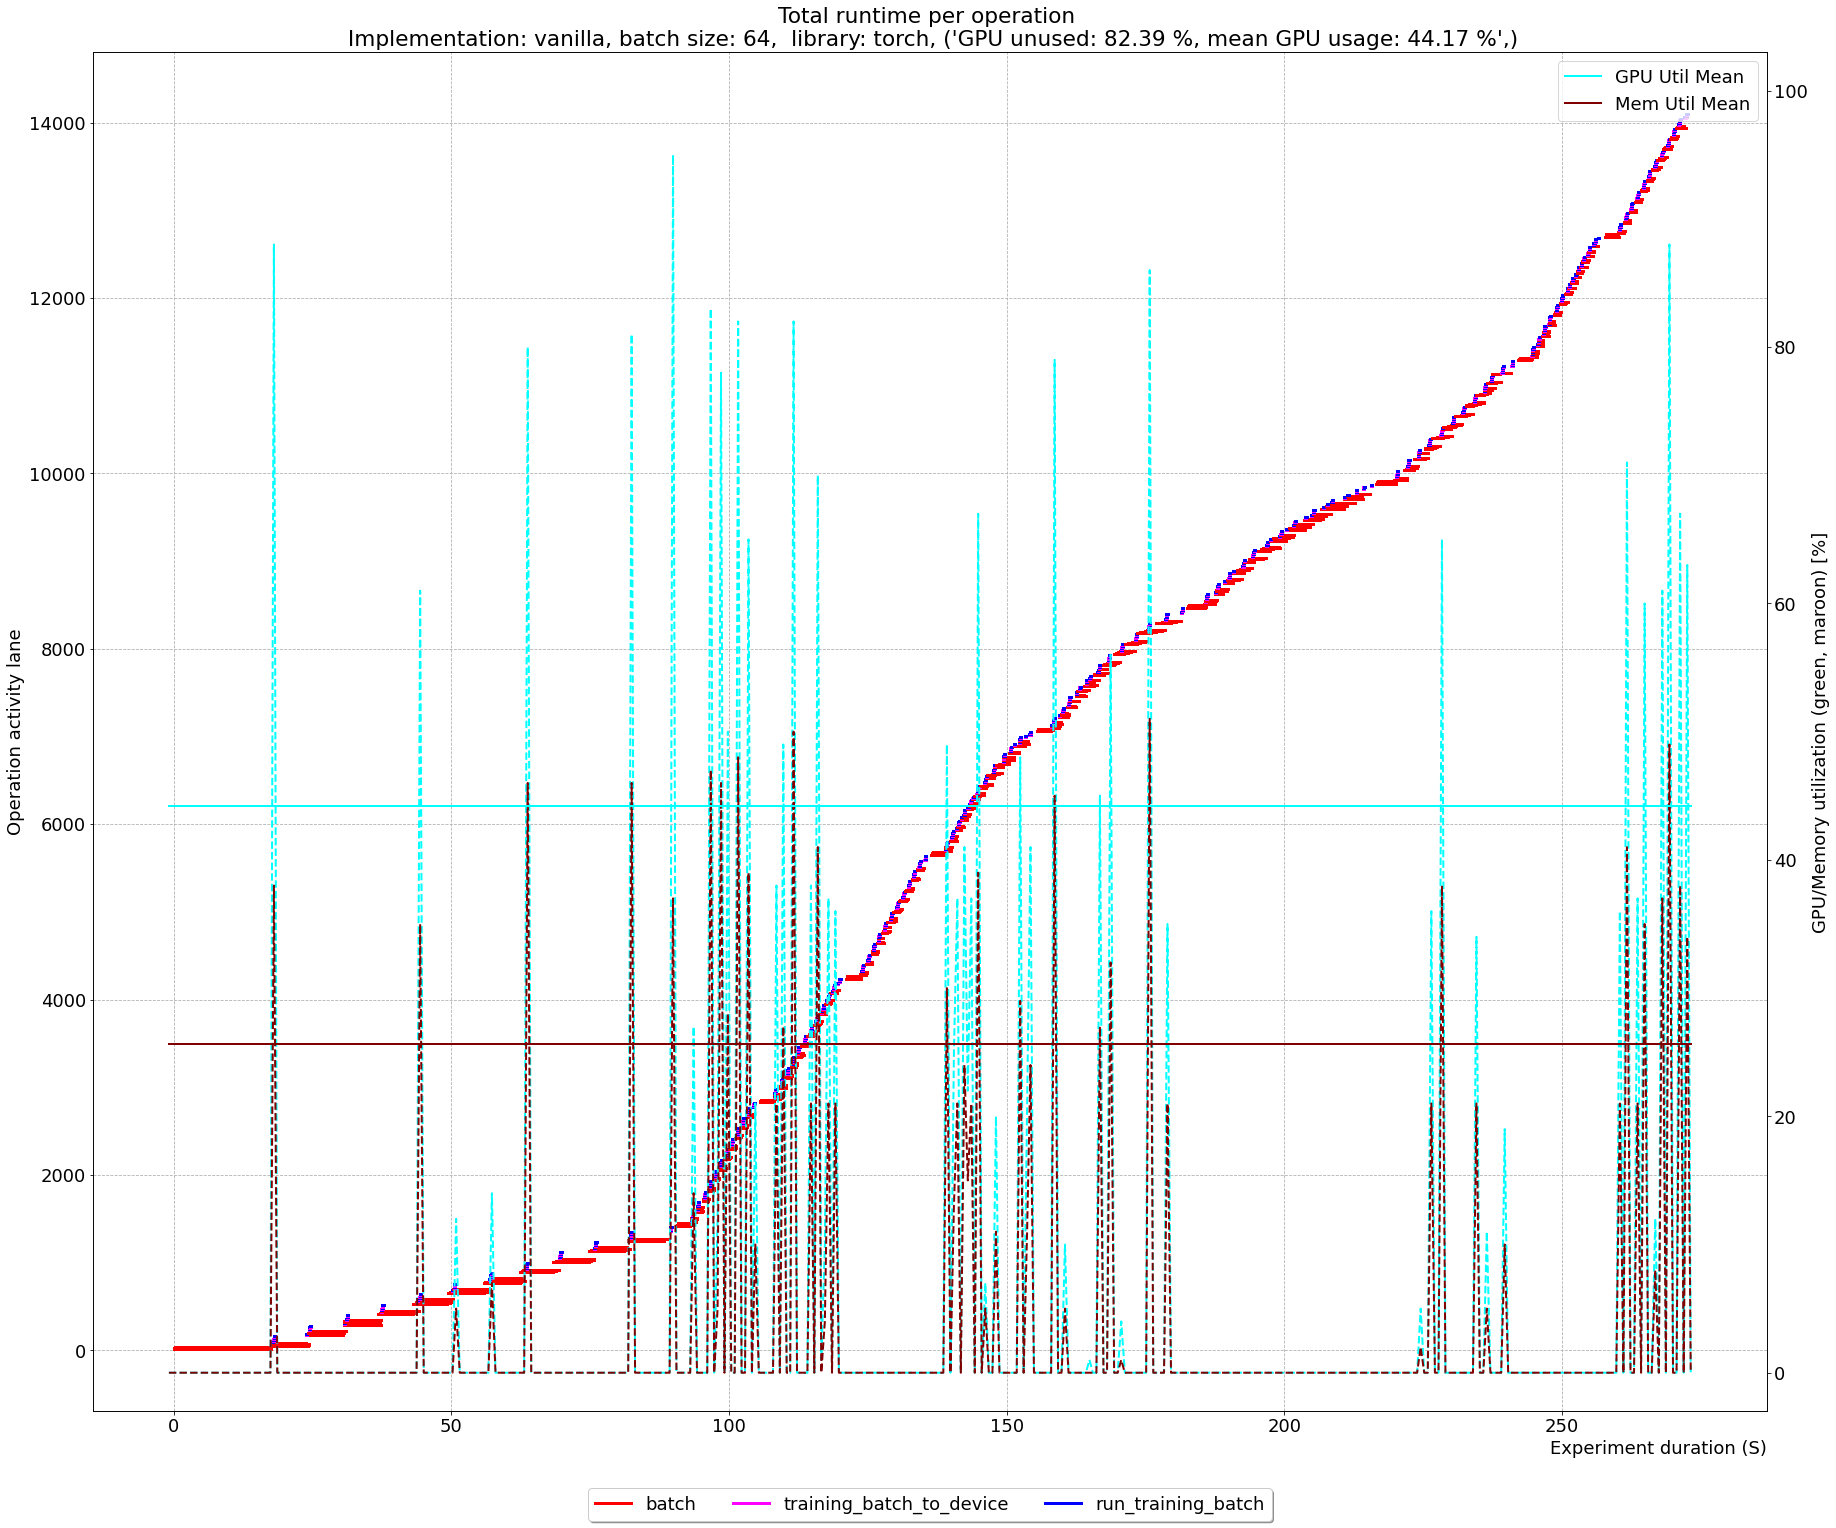

timestamp False
29.679425837320576 10.32972972972973


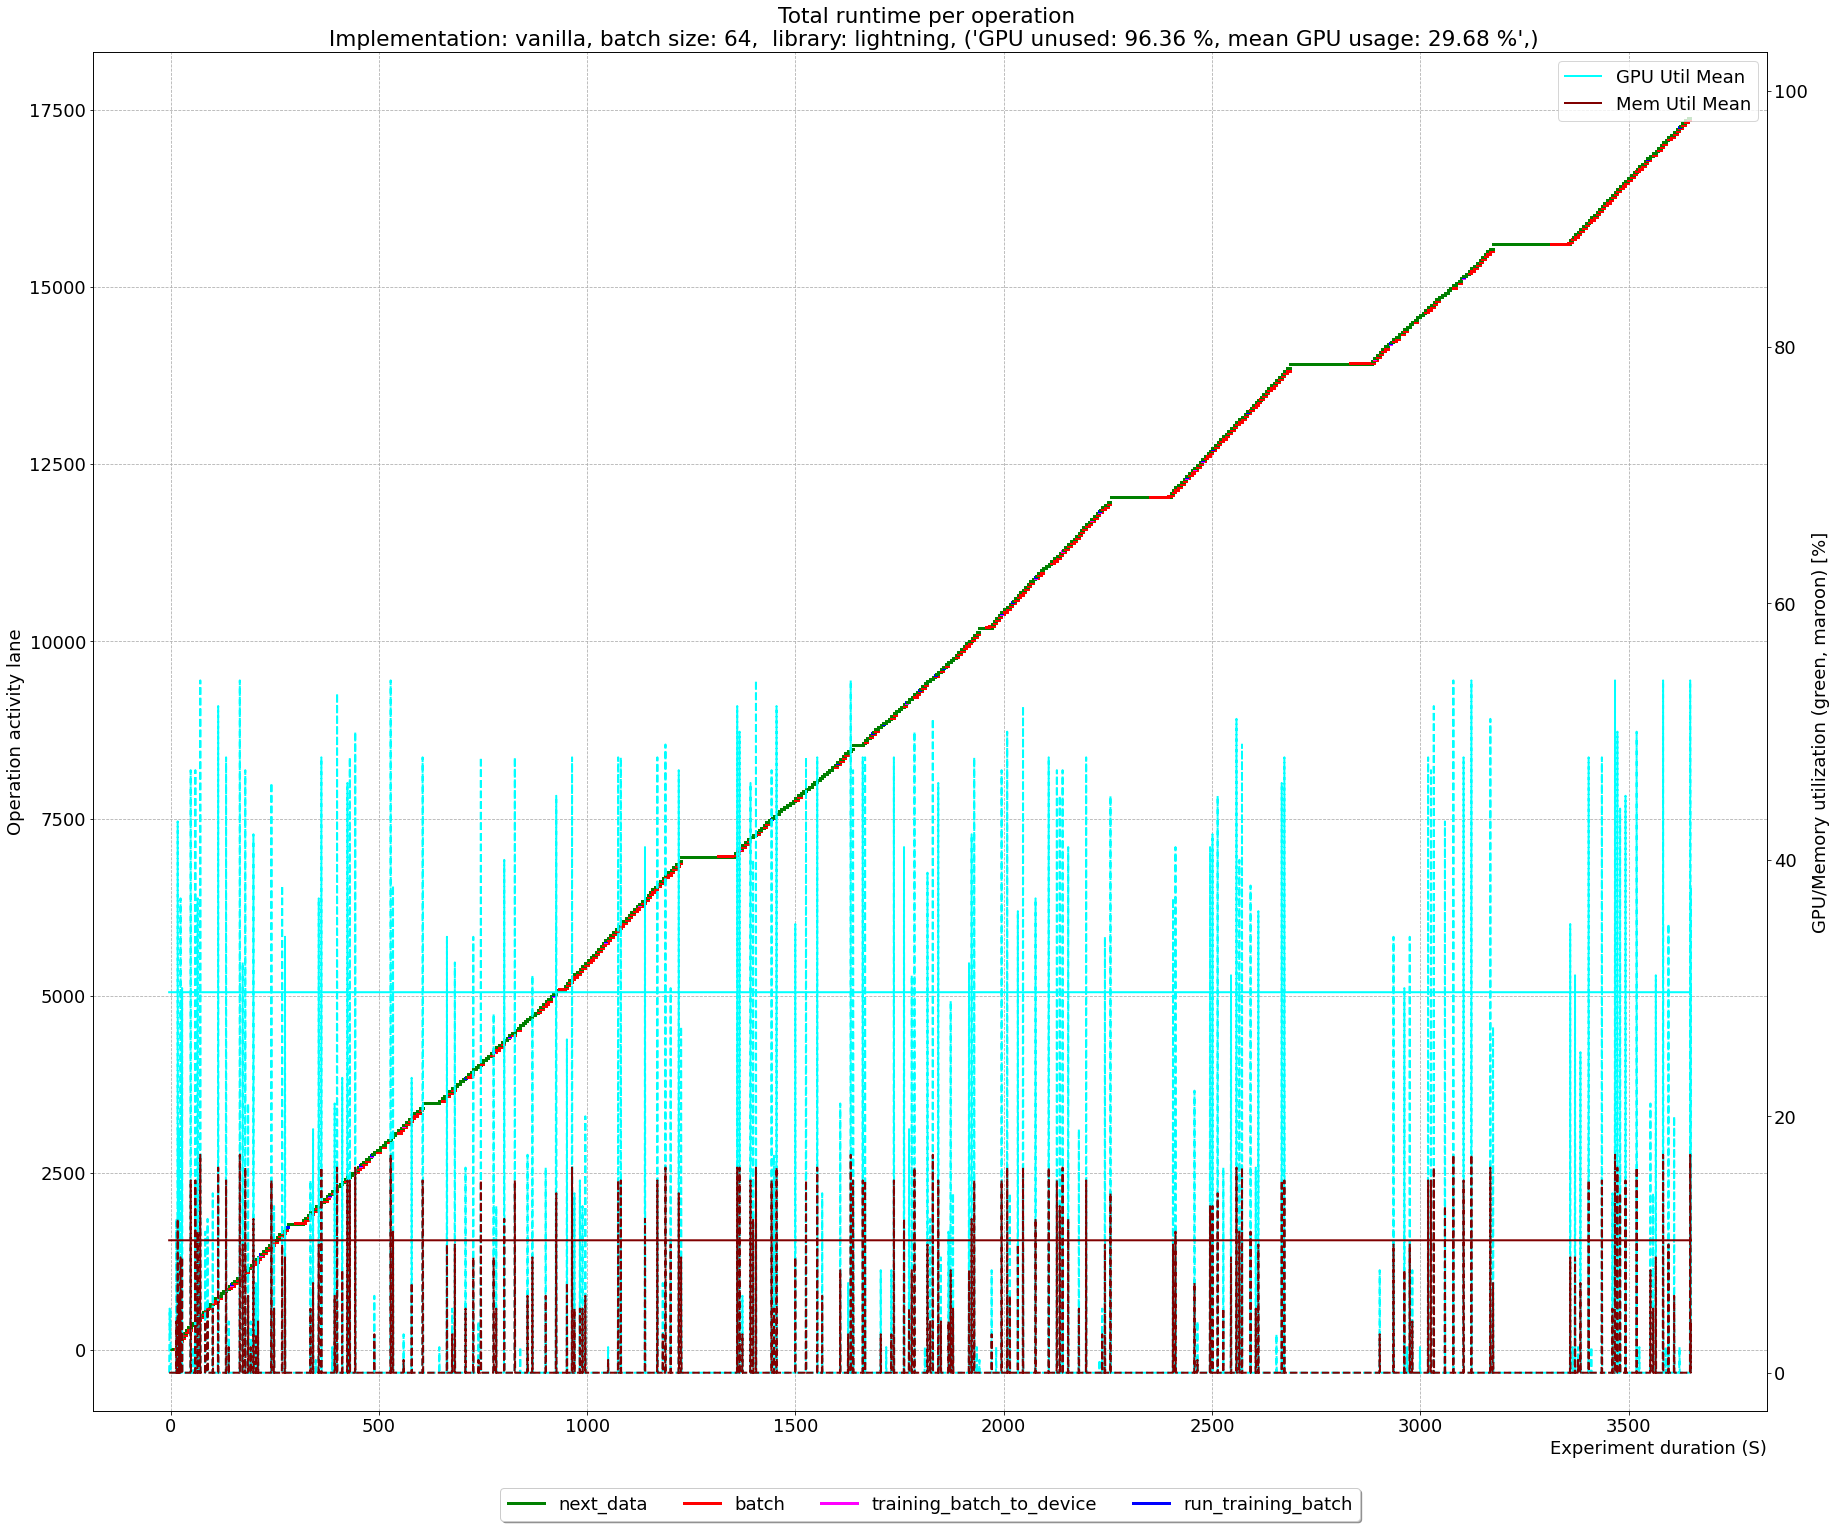

In [11]:
unique_runs_s3, unique_functions, colors, lanes = get_colors_runs_and_lanes(df_dataloader_s3)
returns_s3 = []

for run in sorted(unique_runs_s3):
    df = df_dataloader_s3[df_dataloader_s3["run"]==run]
    dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
    df = df.drop_duplicates(subset="id", keep="first", inplace=False) 
    result = show_timelines_with_gpu(df=df, gpu_util=dfgpu, lanes=lanes, colors=colors, run=run, 
                                     flat=False, show_gpu=True, zoom=False, zoom_epochs=2,
                                     skip_plot=False, ms=False)
    result["run"]=run
    returns_s3.append(result)

#### Result tables

The following two tables display throughput details for both experiments. The default sample size, i.e. number of dataset items is 300.

In [13]:
# sanity check
get_metadata_info(output_base_folder / "1711-justfetch/s3" / unique_runs_s3[0])

Dataset:  3000
Batch size: 64
Epochs:  10
Images total:  30000
Batches per epoch 47
Images total (rounded):  30080


#### AWS S3

In [14]:
df_full_s3 = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)
results_s3 = pd.DataFrame.from_records(data=returns_s3)
r = get_throughput(results_s3, "1711-justfetch/s3", df_full_s3, unique_runs_s3, output_base_folder)
r

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:04<00:00, 43.34it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0   297.539659      79.157895               45.141414       5.309474   
1   436.889108      80.412371               42.037594       2.606775   
2   227.241910      75.783476               36.270588       5.176638   
3   431.668852      78.273810               39.678082       2.741071   
4   272.509452      82.388060               44.169492       4.367164   
5  3648.227165      96.358251               29.679426       0.332985   

   mem_util_mean_no_zeros implementation cache    library   throughput  \
0               28.337079       threaded     1      torch  1008.268953   
1               14.750000       threaded     1  lightning   686.673104   
2               24.554054        asyncio     1      torch  1320.179008   
3               13.544118        asyncio     1  lightning   694.977177   
4               25.666667        vanilla     1      torch  1100.879244   
5               10.329730        vanilla     1  lightning    82.231721   

        dl_MB   imgs    Mbits/s      MB/s  
0  360.200556  30000   9.684774  1.210597  
1  360.200556  30000   6.595734  0.824467  
2  407.719423  30000  14.353670  1.794209  
3  407.719423  30000   7.556152  0.944519  
4  407.719423  30000  11.969329  1.496166  
5  407.719423  30000   0.894066  0.111758

#### Scratch

In [15]:
df_full_scratch = extract_pandas(output_base_folder, folder_filter=scratch_folder_filter)
results_scratch = pd.DataFrame.from_records(data=returns_scratch)
r = get_throughput(results_scratch, "1711-justfetch/scratch", df_full_scratch, unique_runs_scratch, output_base_folder)
r

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [00:05<00:00, 39.91it/s]


runtime  gpu_util_zero  gpu_util_mean_no_zeros  mem_util_mean  \
0   93.802143      40.000000               67.444444      21.000000   
1  315.063369      80.000000               32.000000       1.880000   
2   50.868543      25.000000               62.000000      26.375000   
3  311.498159      76.000000               32.666667       2.320000   
4   62.389921      27.272727               49.750000      19.818182   
5  237.013317      44.736842               24.238095       4.052632   

   mem_util_mean_no_zeros implementation cache    library   throughput  \
0               35.000000       threaded     1      torch  3198.221164   
1               15.666667       threaded     1  lightning   952.189400   
2               42.200000        asyncio     1      torch  5897.554363   
3               14.500000        asyncio     1  lightning   963.087554   
4               27.250000        vanilla     1      torch  4808.469006   
5               10.266667        vanilla     1  lightning  1265.751664   

        dl_MB   imgs    Mbits/s      MB/s  
0  697.505076  30000  59.487347  7.435918  
1  697.505076  30000  17.710852  2.213856  
2  374.485815  30000  58.894679  7.361835  
3  374.485815  30000   9.617670  1.202209  
4  374.485815  30000  48.018758  6.002345  
5  374.485815  30000  12.640161  1.580020